# Data Ingestion

## Imports

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import  SelectFromModel


## Data Loading

In [114]:
data = pd.read_csv('data.csv', encoding='latin-1', sep=';')
pd.pandas.set_option('display.max_columns', None)

print("Data contains ", data.shape[0]," rows and ", data.shape[1]," columns")

Data contains  1267  rows and  24  columns


## Head

In [4]:
data.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


# Exploratory Data Analysis (EDA)

## Data Types




### Group
**Description:** Group categorization.

**Categories:**
- 1 (Local ED)
- 2 (Reginal ED)

**Type:** Categorical Nominal

### Sex
**Description:** Patient's sex.

**Categories:**
- 1 (Female)
- 2 (Male)

**Type:** Categorical Nominal

### Age 
**Description:** Patient's age.

**Type:** Numerical Discrete

### Patient number per hour
**Description:** Number of patients in the Emergency Department per hour.

**Type:** Numerical Discrete

### Arrival mode
**Description:** How patients arrive at the Emergency Department.

**Categories:**
- 1 (Walking)
- 2 (Public Ambulance)
- 3 (Private Vehicle)
- 4 (Private Ambulance)
- 5 (Public transport)
- 6 (Wheelchair)
- 7 (Other)

**Type:** Categorical Nominal 

### Injury 
**Description:** Whether the patient is injured or not.

**Categories:**
- 1 (No)
- 2 (Yes)

**Type:** Categorical Nominal

### Chief_complain
**Description:** The patient's complaint.

**Type:** Categorical Nominal 

### Mental
**Description:** The mental state of the patient.

**Categories:**
- 1 (Alert)
- 2 (Verbal Response)
- 3 (Pain Response)
- 4 (Unresponsive)

**Type:** Categorical Nominal

### Pain
**Description:** Whether the patient has pain.

**Categories:**
- 1 (Yes)
- 0 (No)

**Type:** Binary

### NRS_pain
**Description:** Numerical rating scales of pain

**Type:** Numeric Discrete

### SBP
**Description:** Systolic Blood Pressure.

**Type:** Numeric Continuous

### DBP
**Description:** Diastolic Blood Pressure.

**Type:** Numeric Continuous

### HR
**Description:** Heart Rate.

**Type:** Numeric Continuous

### RR
**Description:** Respiratory Rate.

**Type:** Numeric Continuous

### BT
**Description:** Body Temperature.

**Type:** Numeric Continuous

### Saturation
**Description:** Saturation using oximeter

**Type:** Numeric Continuous

### KTAS_RN
**Description:** Triage result of nurse in ED

**Categories:**
- 1,2,3 = Emergency
- 4,5 = Non-Emergency

**Type:** Numeric Continuous

### Disposition
**Description:** Action to be taken

**Categories:**
- 1 (Discharge)
- 2 (Admission to ward)
- 3 (Admission to ICU)
- 4 (AMA discharge)
- 5 (Transfer)
- 6 (Death)
- 7 (OP fom ED)

**Type:** Categorical Nominal

### Error_Group
**Categories:**
- 1 (Vital Sign)
- 2 (Physical exame)
- 3 (Psychatric)
- 4 (Pain)
- 5 (Mental)
- 6 (Underlying Disease)
- 7 (Medical records of other ED)
- 8 (On set)
- 9 (Other)

**Type:** Categorical Nominal

### Length of stay_min
**Description:** Length of stay in ED (minutes)

**Type:** Numeric Continuous
### KTAS duration_min
**Description:** Length of Triage (minutes)

**Type:** Numeric Continous 

### Mistriage
**Categories:**
- 0 (Correct)
- 1 (Over Triage)
- 2 (Under Triage)

**Type:** Categorical Nominal

In [5]:
data.dtypes

Group                        int64
Sex                          int64
Age                          int64
Patients number per hour     int64
Arrival mode                 int64
Injury                       int64
Chief_complain              object
Mental                       int64
Pain                         int64
NRS_pain                    object
SBP                         object
DBP                         object
HR                          object
RR                          object
BT                          object
Saturation                  object
KTAS_RN                      int64
Diagnosis in ED             object
Disposition                  int64
KTAS_expert                  int64
Error_group                  int64
Length of stay_min           int64
KTAS duration_min           object
mistriage                    int64
dtype: object

## Statistical Summary

In [6]:
#data.describe().T
data.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Group,1267.0,1.456985,0.498343,1.0,1.0,1.0,2.0,2.0,2.0,2.00,2.0
Sex,1267.0,1.521705,0.499726,1.0,1.0,2.0,2.0,2.0,2.0,2.00,2.0
Age,1267.0,54.423836,19.725033,16.0,37.0,57.0,71.0,79.0,82.0,88.00,96.0
Patients number per hour,1267.0,7.519337,3.160563,1.0,5.0,7.0,10.0,12.0,13.0,15.00,17.0
Arrival mode,1267.0,2.820837,0.807904,1.0,2.0,3.0,3.0,4.0,4.0,5.00,7.0
Injury,1267.0,1.192581,0.394482,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0
Mental,1267.0,1.105762,0.447768,1.0,1.0,1.0,1.0,1.0,2.0,3.34,4.0
Pain,1267.0,0.563536,0.496143,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0
KTAS_RN,1267.0,3.335438,0.885391,1.0,3.0,3.0,4.0,4.0,5.0,5.00,5.0
Disposition,1267.0,1.609313,1.157983,1.0,1.0,1.0,2.0,2.0,4.0,7.00,7.0


## Null Values

In [7]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Saturation         688
Diagnosis in ED      2
dtype: int64


## Unique Values

In [8]:
for column in data.columns:
  print('Column ', column, ' has ', data[column].nunique(), ' unique values')

Column  Group  has  2  unique values
Column  Sex  has  2  unique values
Column  Age  has  81  unique values
Column  Patients number per hour  has  16  unique values
Column  Arrival mode  has  7  unique values
Column  Injury  has  2  unique values
Column  Chief_complain  has  417  unique values
Column  Mental  has  4  unique values
Column  Pain  has  2  unique values
Column  NRS_pain  has  11  unique values
Column  SBP  has  127  unique values
Column  DBP  has  83  unique values
Column  HR  has  94  unique values
Column  RR  has  11  unique values
Column  BT  has  46  unique values
Column  Saturation  has  22  unique values
Column  KTAS_RN  has  5  unique values
Column  Diagnosis in ED  has  583  unique values
Column  Disposition  has  7  unique values
Column  KTAS_expert  has  5  unique values
Column  Error_group  has  10  unique values
Column  Length of stay_min  has  716  unique values
Column  KTAS duration_min  has  392  unique values
Column  mistriage  has  3  unique values


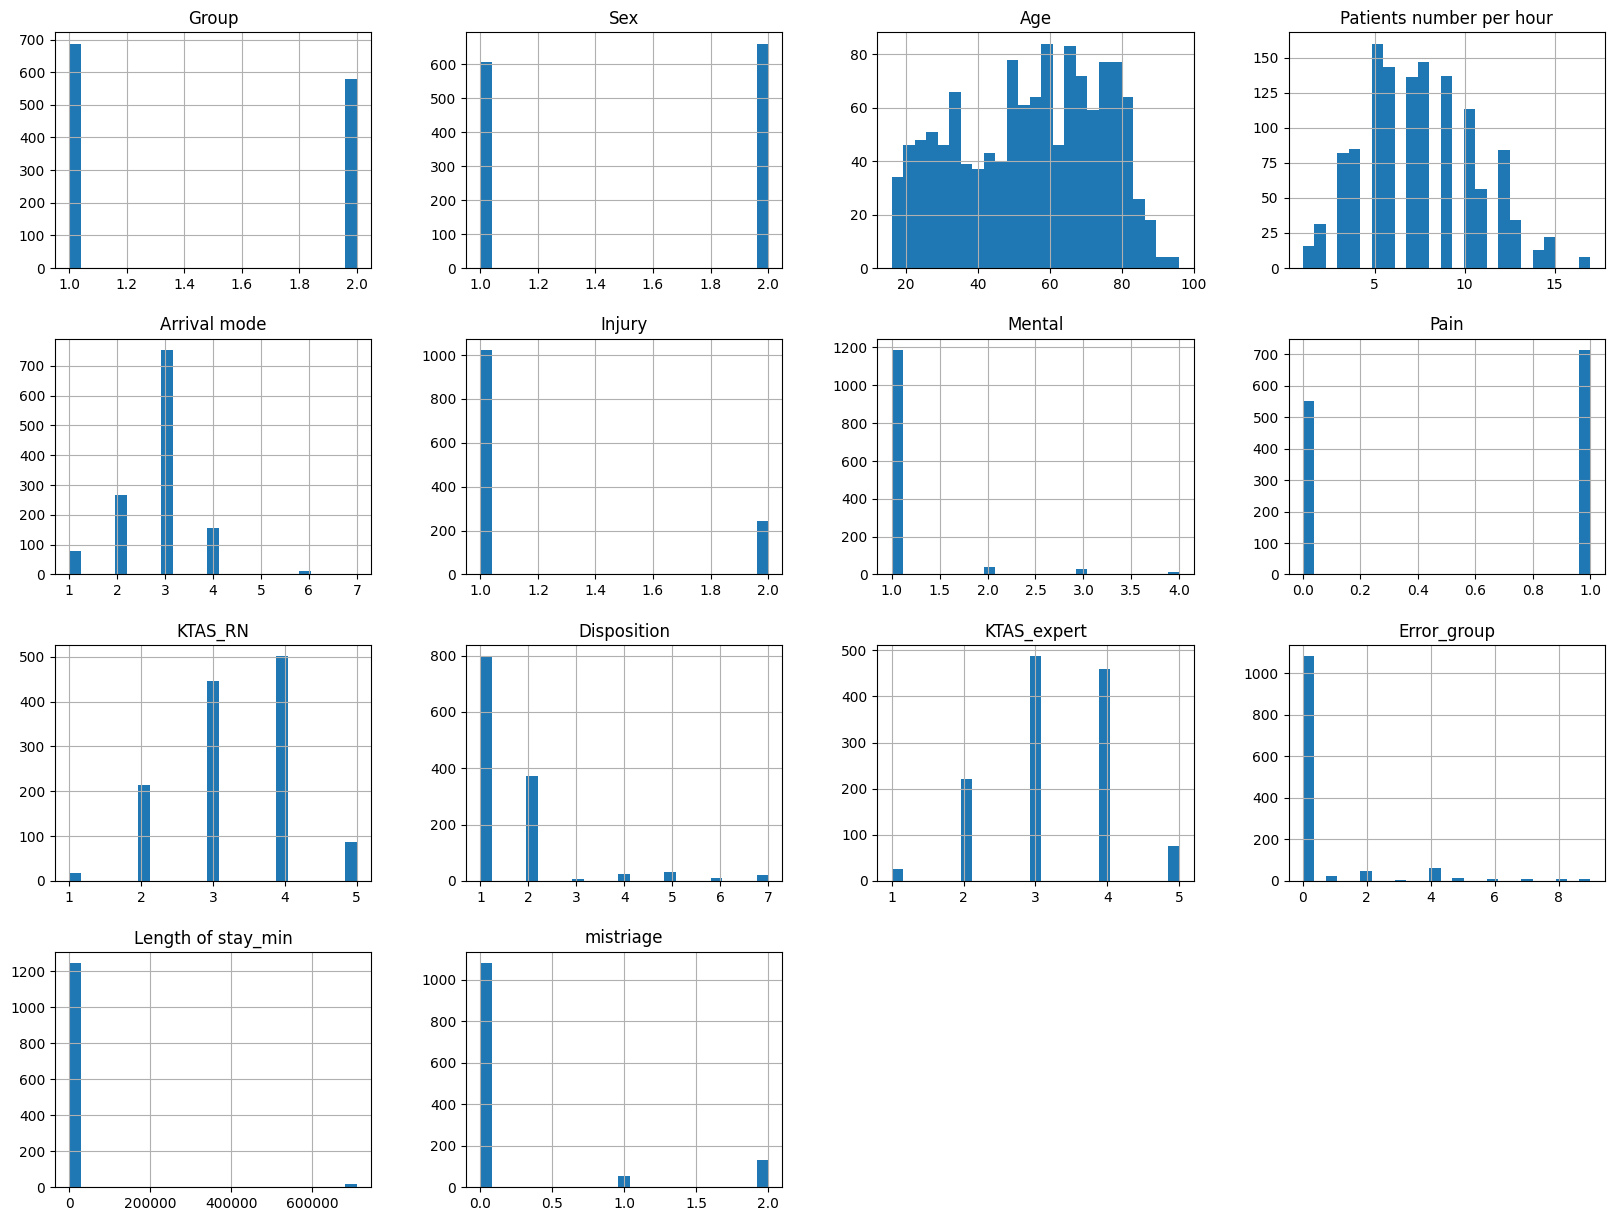

In [9]:
#distribution of all variables histograms
data.hist(bins=25, figsize=(20,15))
plt.show()

## Target Distribution Graph

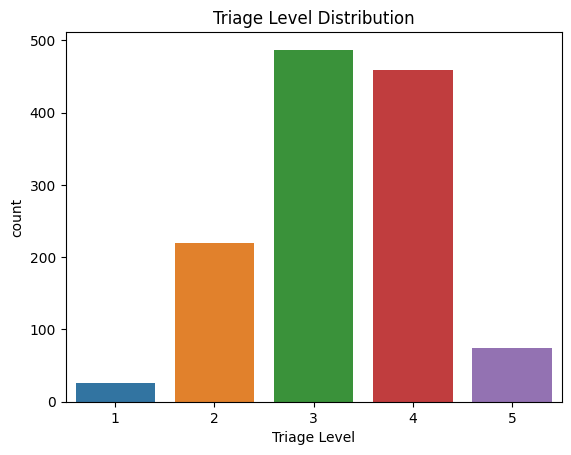

In [14]:
#Plot the distribution of the target variable with x by order
sb.countplot(x='KTAS_expert', data=data)
plt.xlabel('Triage Level')
plt.title('Triage Level Distribution')
plt.show()

# Data Preprocessing

## Feature Engineering

### Replacing "??" and "#BO�!" for null values

In [115]:
data['NRS_pain'] = data[["NRS_pain"]].replace("#BOÞ!",0)


cols_to_clean = ["SBP", "DBP", "HR", "RR", "BT", "Saturation"]
data[cols_to_clean] = data[cols_to_clean].replace("??", np.NaN)

## count how many "??" in selected columns after cleaning
print("\nAfter cleaning:")
for col in cols_to_clean:
    print(f"{col}: {data[col].value_counts().get('??', 0)}")


After cleaning:
SBP: 0
DBP: 0
HR: 0
RR: 0
BT: 0
Saturation: 0


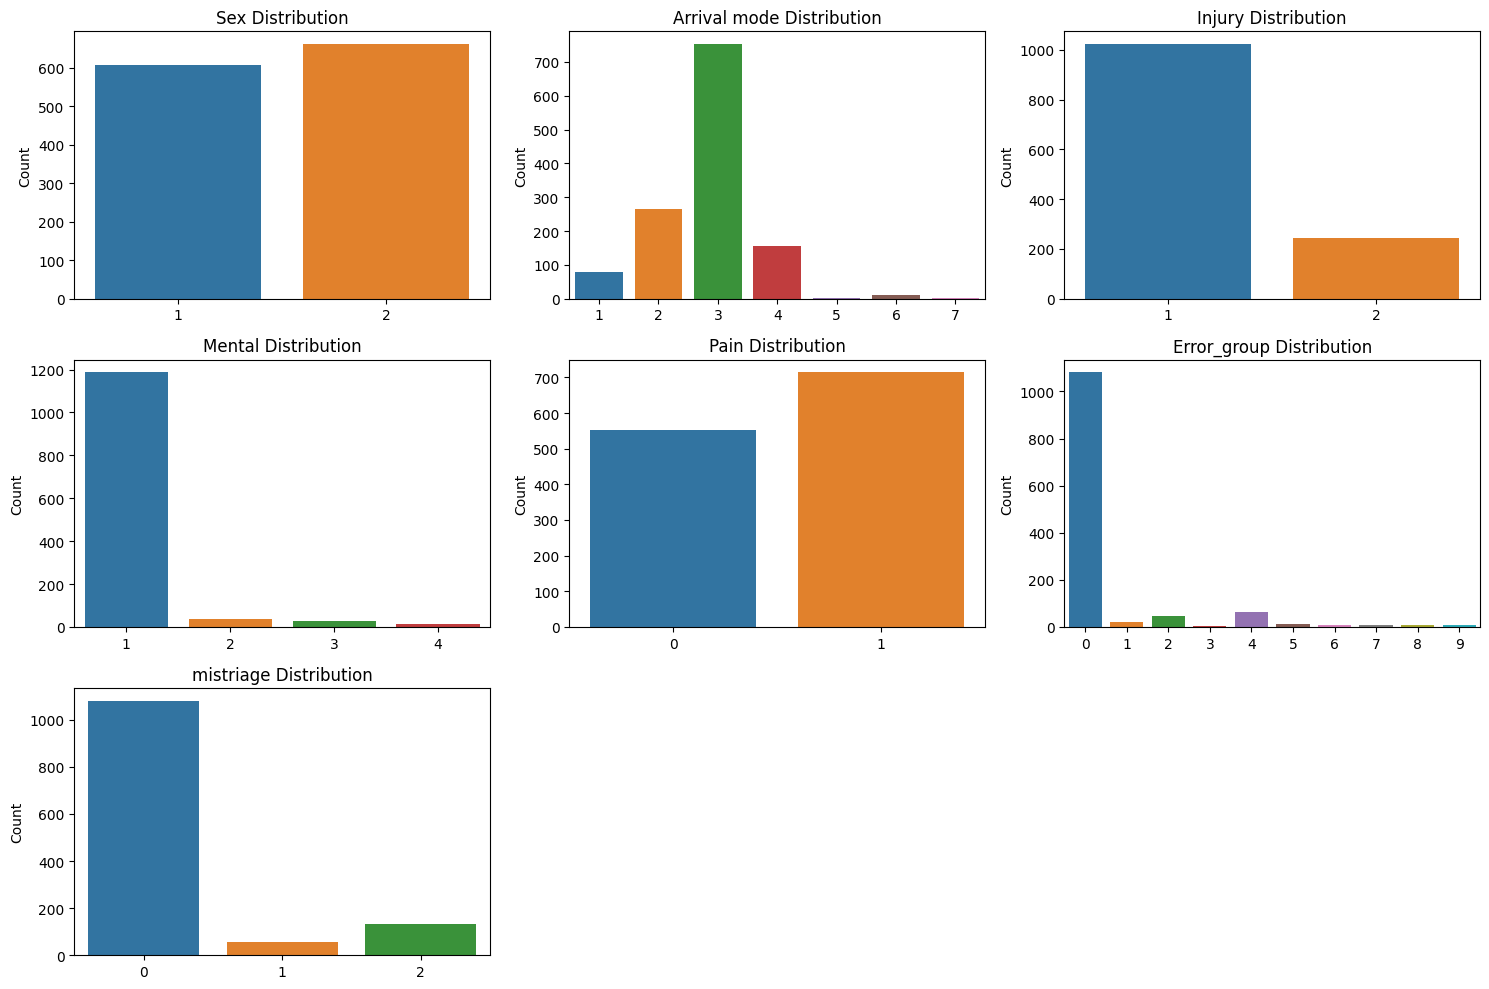

In [16]:
categorical_columns = ['Sex', 'Arrival mode', 'Injury', 'Mental', 'Pain', 'Error_group', 'mistriage']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sb.countplot(x=column, data=data)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

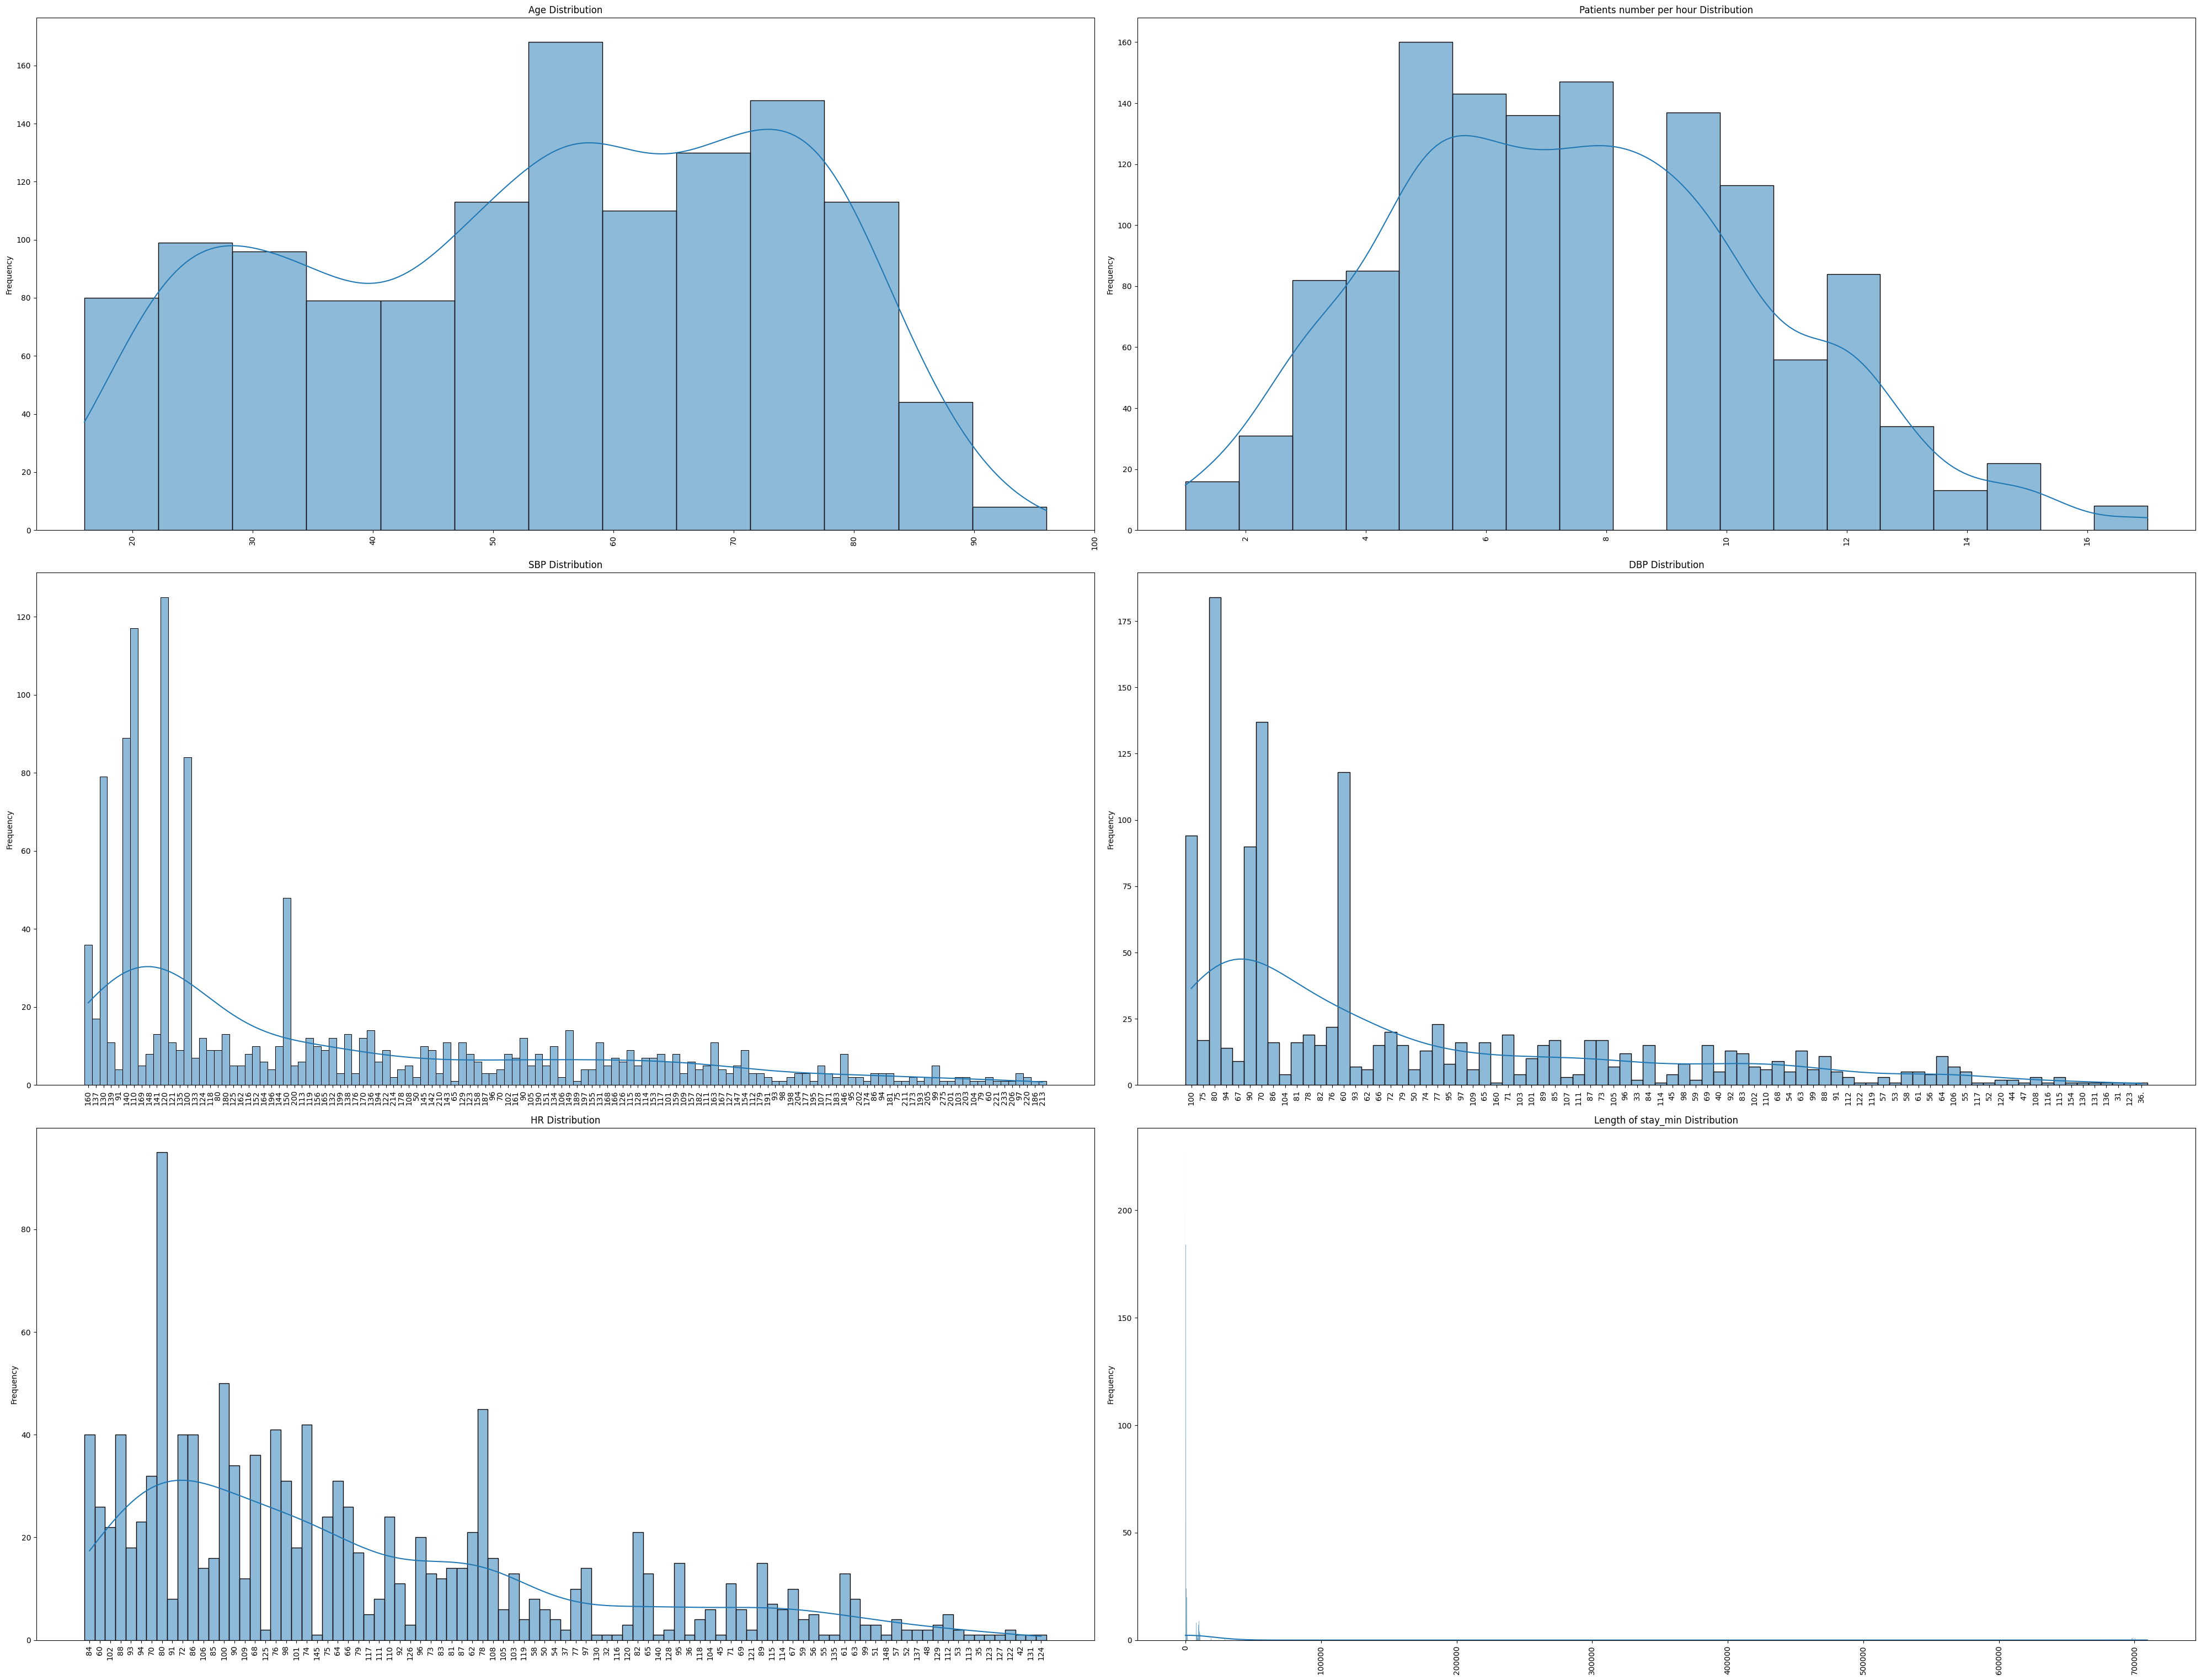

In [17]:
numeric_columns = ['Age', 'Patients number per hour', 'SBP', 'DBP', 'HR', 'Length of stay_min']

plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sb.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Replacing binary columns

In [116]:
data.rename(columns={'Sex': 'Female'}, inplace=True)
data["Female"] = data["Female"].replace(2,0)

data.rename(columns={'Injury': 'Injured'}, inplace=True)
data["Injured"] = data["Injured"].replace({1: 0, 2: 1})

### Replacing the numbers by their categorical value

In [117]:
group_map = ['Local ED 3th Degree', 'Regional ED 4tg Degree']
arrival_mode_map = ['Walking', 'Public Ambulance', 'Private Vehicle', 'Private Ambulance', 'Public Transport', 'Wheelchair', 'Other']
mental_map = ['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive']
disposition_map = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
error_group_map = ['Vital Sign', 'Physical Exam', 'Psychatric', 'Pain', 'Mental', 'Underlying Disease', 'Medical Records of other ED', 'On set', 'Other']
mistriage_map = ['Correct','Over Triage', 'Under Triage']


data['Group'] = data['Group'].replace([1,2], group_map)
data['Arrival mode'] = data['Arrival mode'].replace([1,2,3,4,5,6,7], arrival_mode_map)
data['Mental'] = data['Mental'].replace([1,2,3,4], mental_map)
data['Disposition'] = data['Disposition'].replace([1,2,3,4,5,6,7], disposition_map)
data['Error_group'] = data['Error_group'].replace([1,2,3,4,5,6,7,8,9], error_group_map)
data['mistriage'] = data['mistriage'].replace([0,1,2], mistriage_map)

data.head()

,Group,Female,Age,Patients number per hour,Arrival mode,Injured,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED 4tg Degree,0,71,3,Private Vehicle,1,right ocular pain,Alert,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,Discharge,4,Physical Exam,86,"5,00",Over Triage
1,Local ED 3th Degree,1,56,12,Private Vehicle,1,right forearm burn,Alert,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",Discharge,5,Pain,64,"3,95",Over Triage
2,Regional ED 4tg Degree,1,68,8,Public Ambulance,1,"arm pain, Lt",Alert,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",Admission to Ward,5,Pain,862,"1,00",Over Triage
3,Local ED 3th Degree,0,71,8,Walking,0,ascites tapping,Alert,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,Discharge,5,Underlying Disease,108,"9,83",Over Triage
4,Local ED 3th Degree,0,58,4,Private Vehicle,0,"distension, abd",Alert,1,3,91,67,93,18,36.5,NaN,4,Ascites,Discharge,5,On set,109,"6,60",Over Triage


## Hypothesis

### H1: **Older Patients more likely to be urgent patients**

TRUE: The urgent levels of KTAS triage are 1,2,3 and we can see that the age range of these 3 levels is higher than the range of levels 4 and 5.

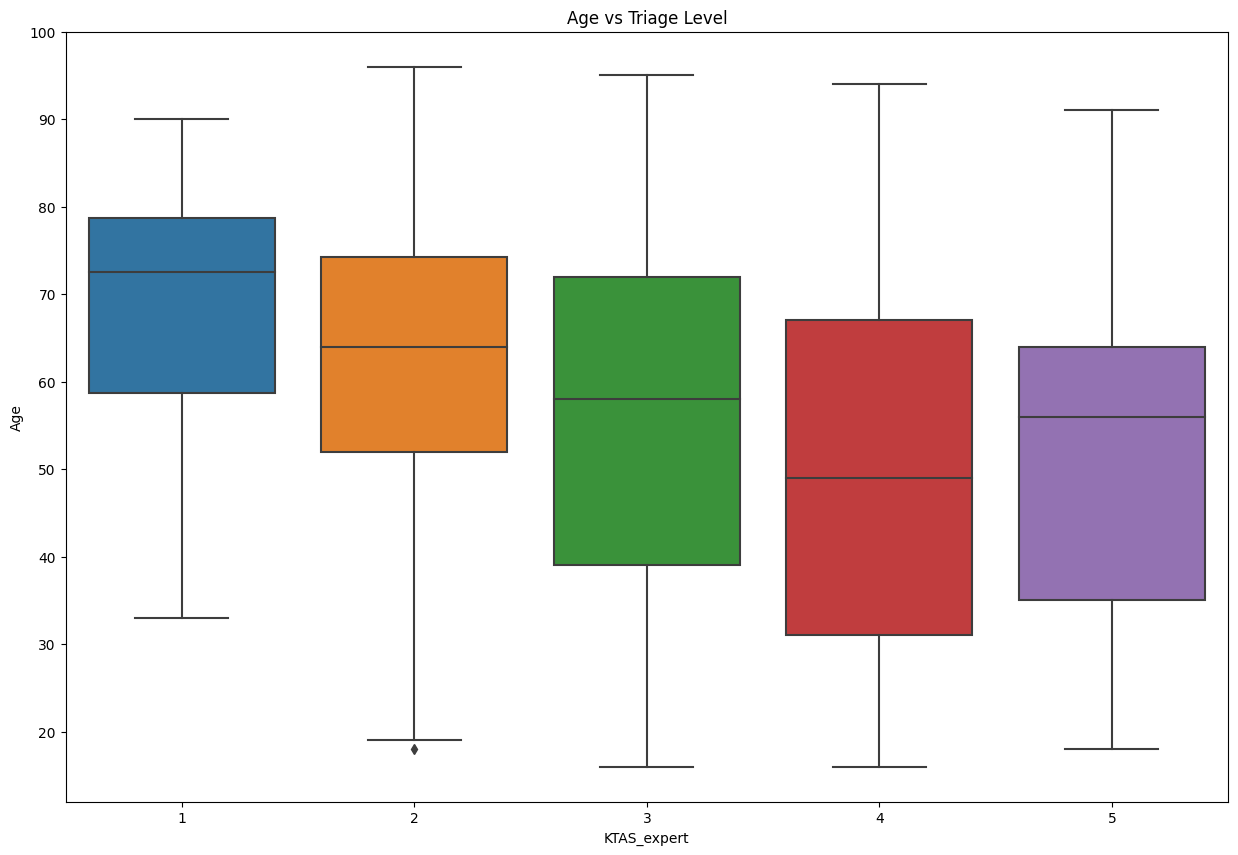

In [27]:
# Create plot that shows the relation betwwen age and triage level
plt.figure(figsize=(15, 10))
sb.boxplot(x='KTAS_expert', y='Age', data=data)
plt.title('Age vs Triage Level')
plt.show()

### H2: **Patients with higher levels of pain are more likely to be urgent patients**

TRUE: The patients with pain levels above 6 (half) are between levels 1 and 4 of the triage, which means that they are likely to be urgent patients (levels 1/2/3).

BUT: Anyway, we don't think it's a straight line. Because there are some patients with average levels of pain who are not urgent patients.

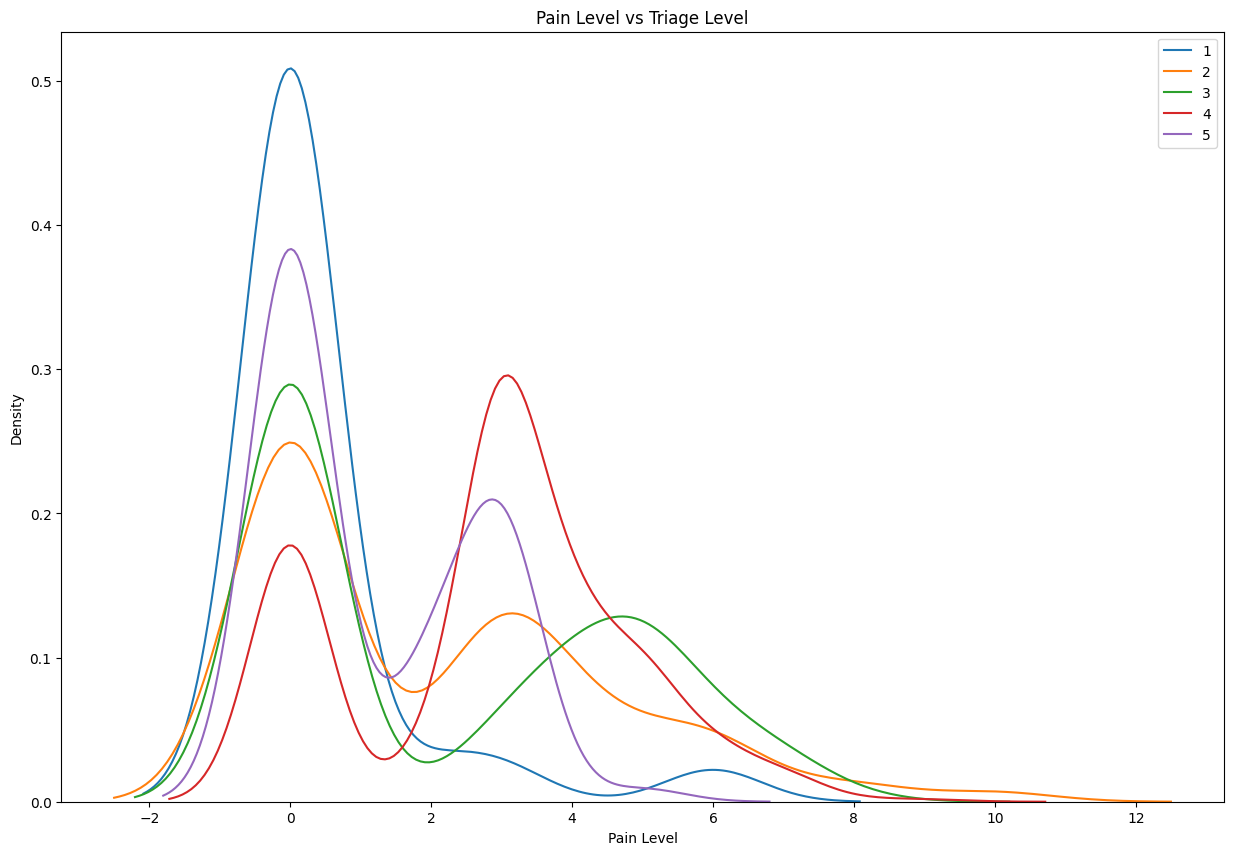

In [24]:
#Create a plot that shows the relation between pain level and triage level
triage_levels = sorted(data['KTAS_expert'].unique())
data['NRS_pain'] = pd.to_numeric(data['NRS_pain'], errors='coerce')
plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['NRS_pain'], label=level)
plt.title('Pain Level vs Triage Level')
plt.xlabel('Pain Level')
plt.ylabel('Density')
plt.legend()
plt.show()

### H3: **Injured patients are more likely to be urgent patients**

FALSE: The majority of patients with an urgent triage level (1/2/3) are not injured.

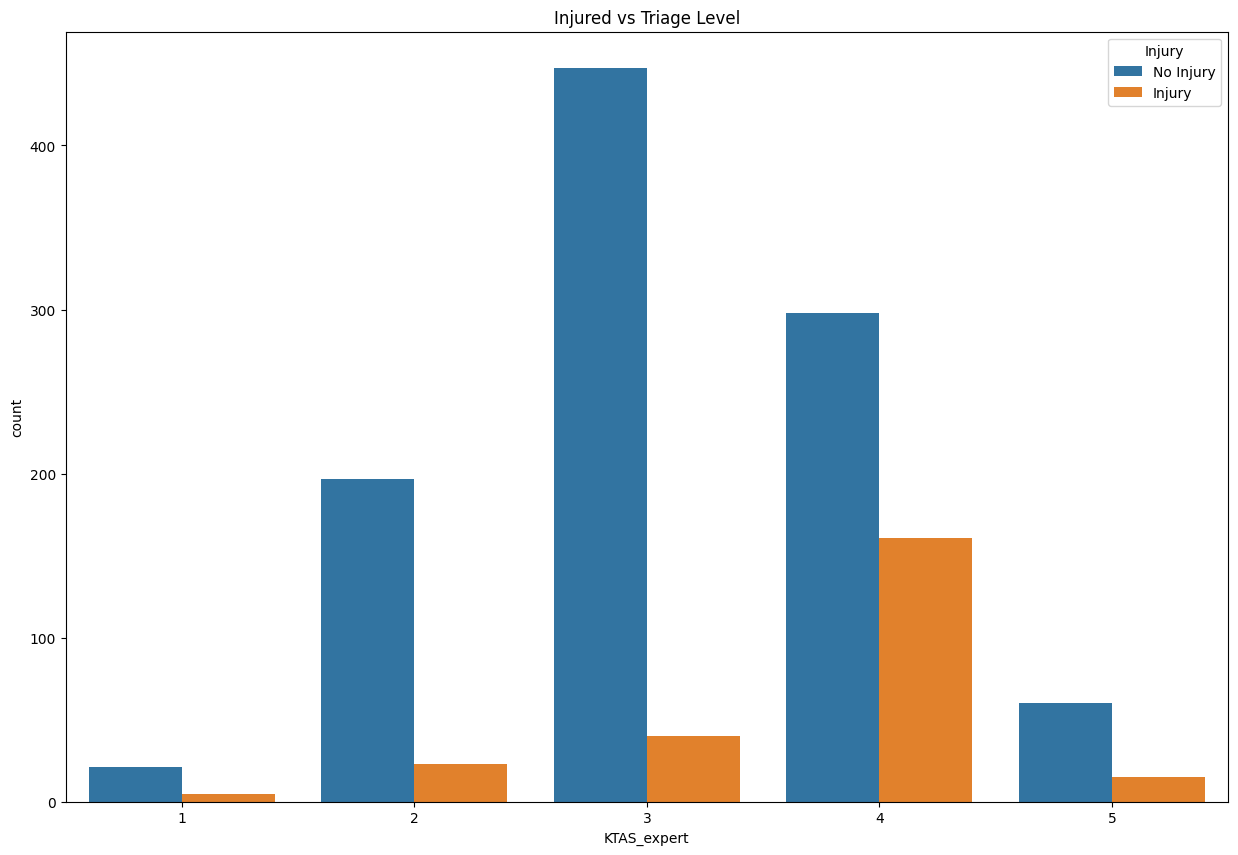

In [25]:
# Create a plot that shows the relation between injury and triage level
# 1 = No injury, 2 = Injury
# Bar chart
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Injured', data=data)
plt.title('Injured vs Triage Level')
plt.legend(title='Injury', loc='upper right', labels=['No Injury', 'Injury'])
plt.show()


### H4: **Patients with poor mental status are more likely to be urgent patients.**

TRUE: Almost all patients with a mental status other than 'Alert' have triage levels 1, 2 and 3, which means they are urgent patients.

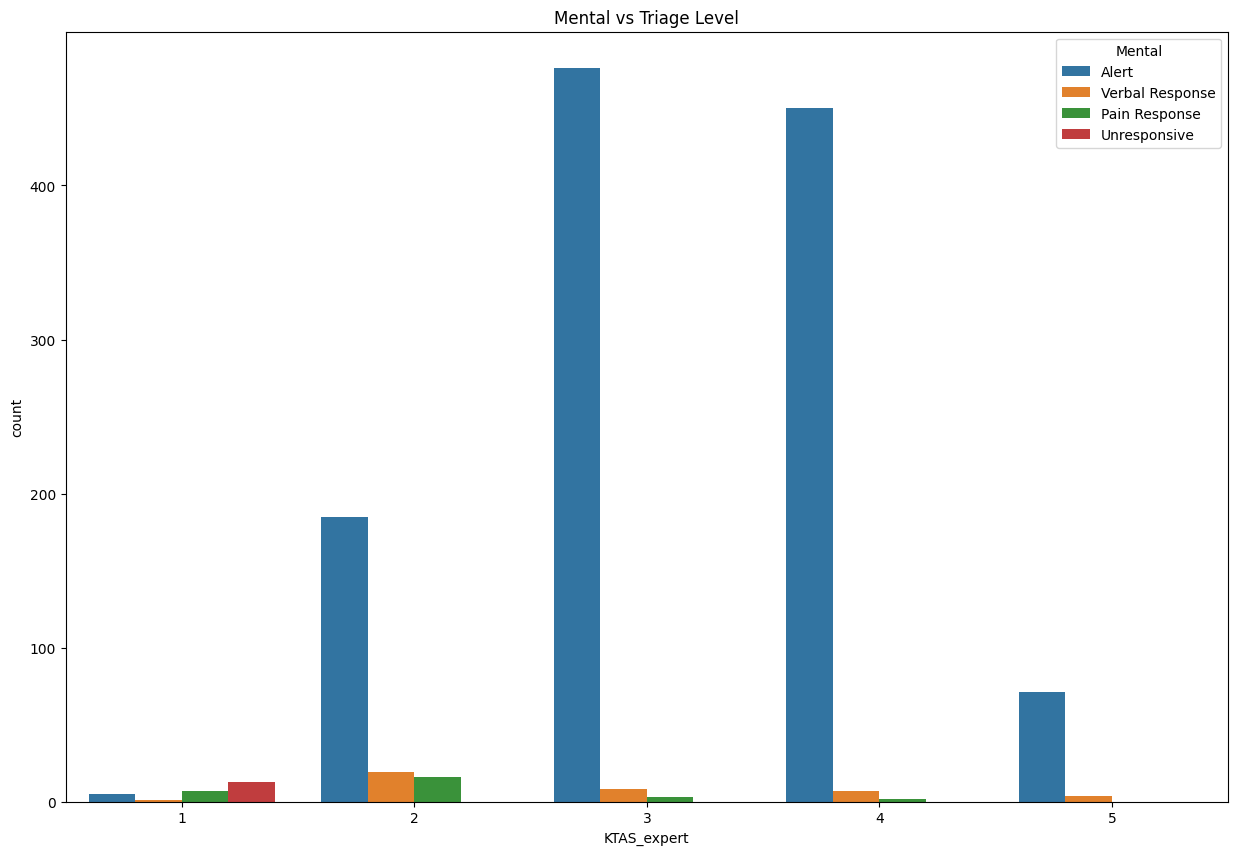

In [28]:
#Create a plot that shows the relation between mental status and triage level
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Mental', data=data)
plt.title('Mental vs Triage Level')
plt.legend(title='Mental', loc='upper right', labels=['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive'])
plt.show()

### H5: **Patients with higher and lower blood presure are more likely to be urgent patients**
TRUE: Patients with the highest and lowest SBP and DBP are triaged to levels that represent urgent patients

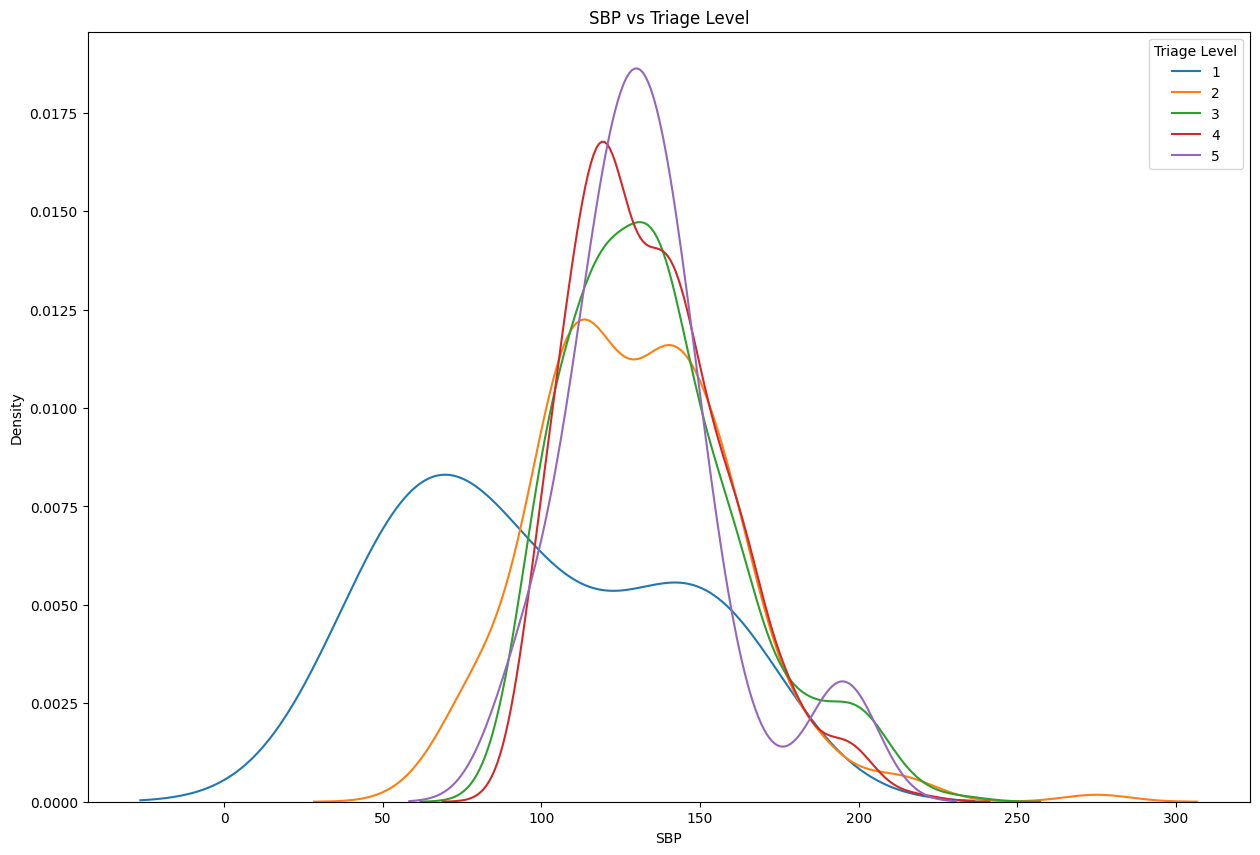

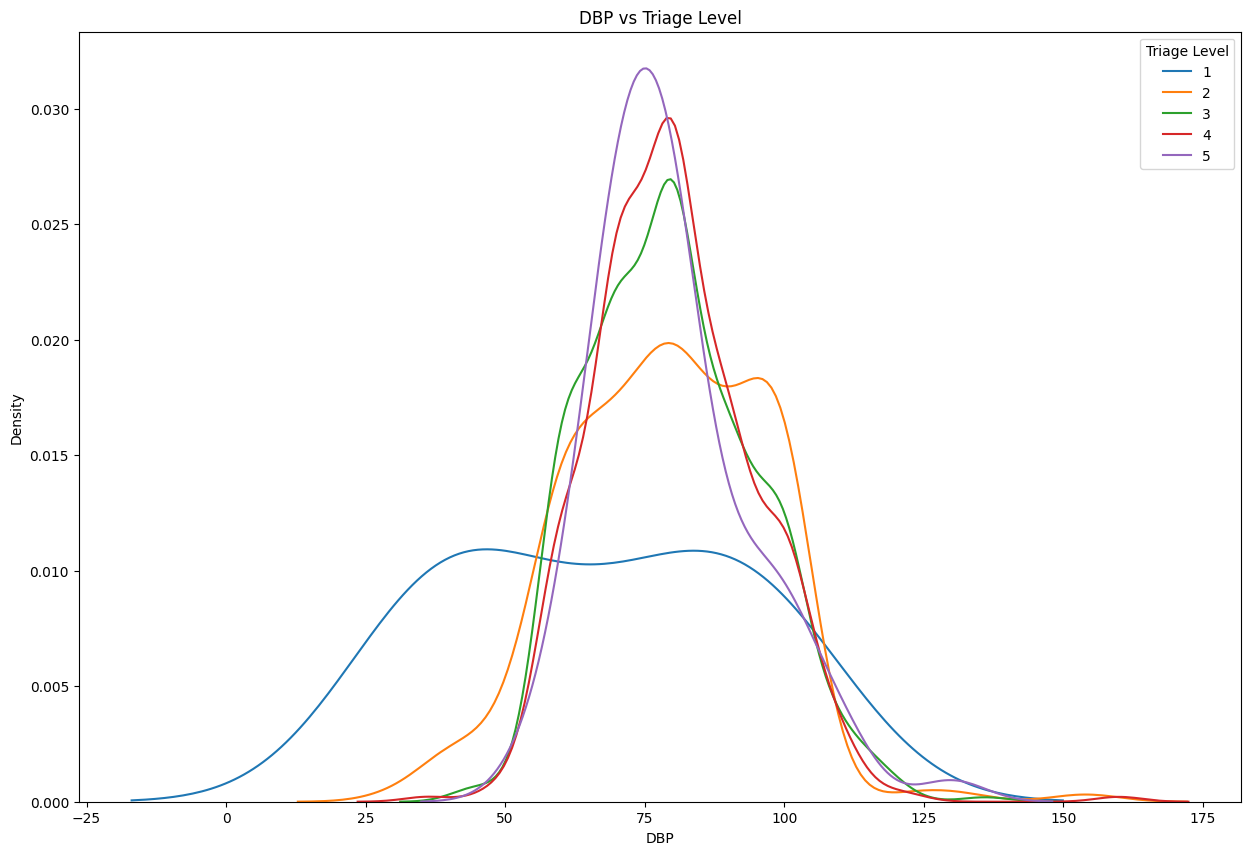

In [29]:
#Create a plot that shows the relation between SBP and DBP and triage level
data['SBP'] = pd.to_numeric(data['SBP'], errors='coerce')
data['DBP'] = pd.to_numeric(data['DBP'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['SBP'], label=level)
plt.title('SBP vs Triage Level')
plt.xlabel('SBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['DBP'], label=level)
plt.title('DBP vs Triage Level')
plt.xlabel('DBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H6: **Patients with higher and lower HR are more likely to be urgent patients**
TRUE: The density of patients with the highest and lowest HR are in levels 1/2/3 of the triage, which means they are urgent patients.

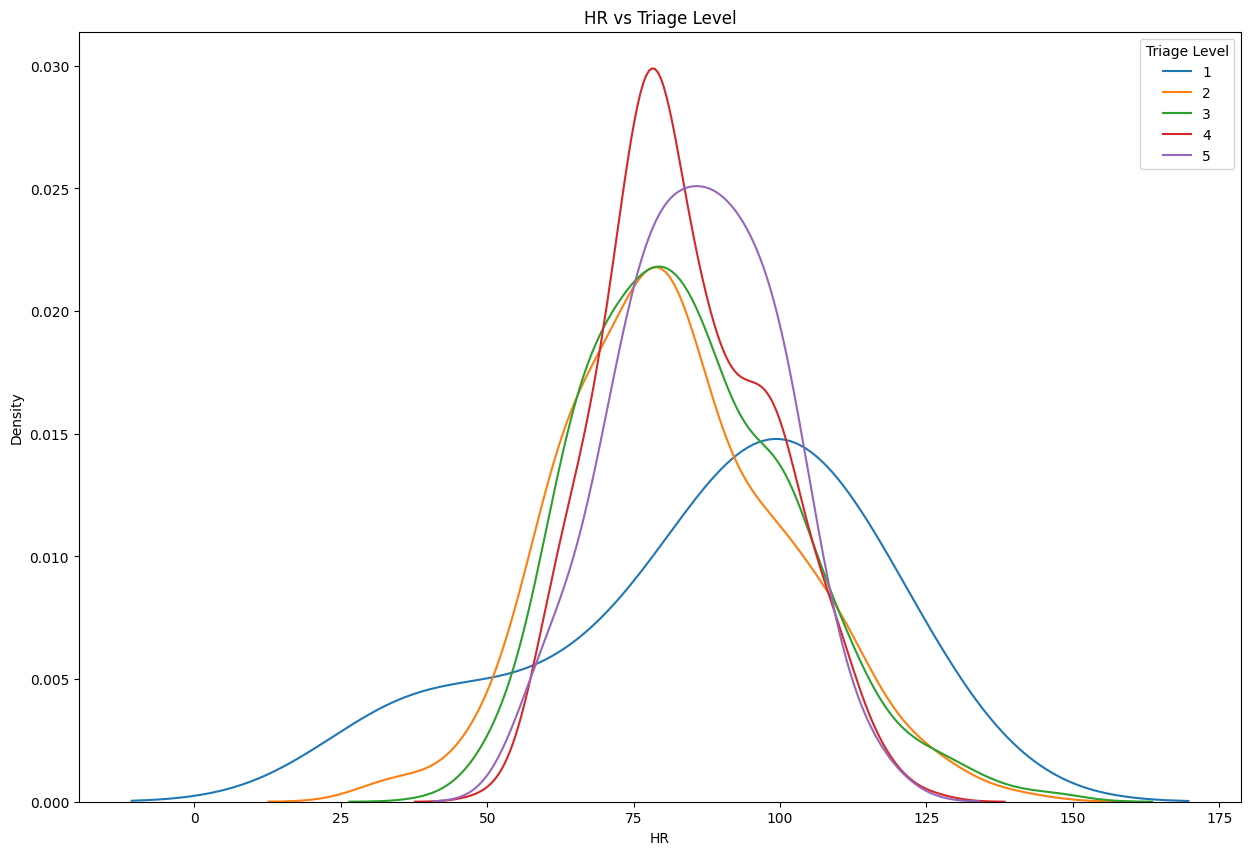

In [30]:
#Create a plot that shows the relation between HR and triage level
data['HR'] = pd.to_numeric(data['HR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['HR'], label=level)
plt.title('HR vs Triage Level')
plt.xlabel('HR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H7: **Patients with higher and lower RR are more likely to be urgent patients**
TRUE FOR THE HIGHER LEVELS: The density of patients with the higher RRs are in levels 1/2/3 of the triage, which means they are urgent patients.

FALSE FOR THE LOWER LEVELS: The density of patients with the lower RRs is distributed for each level of triage.

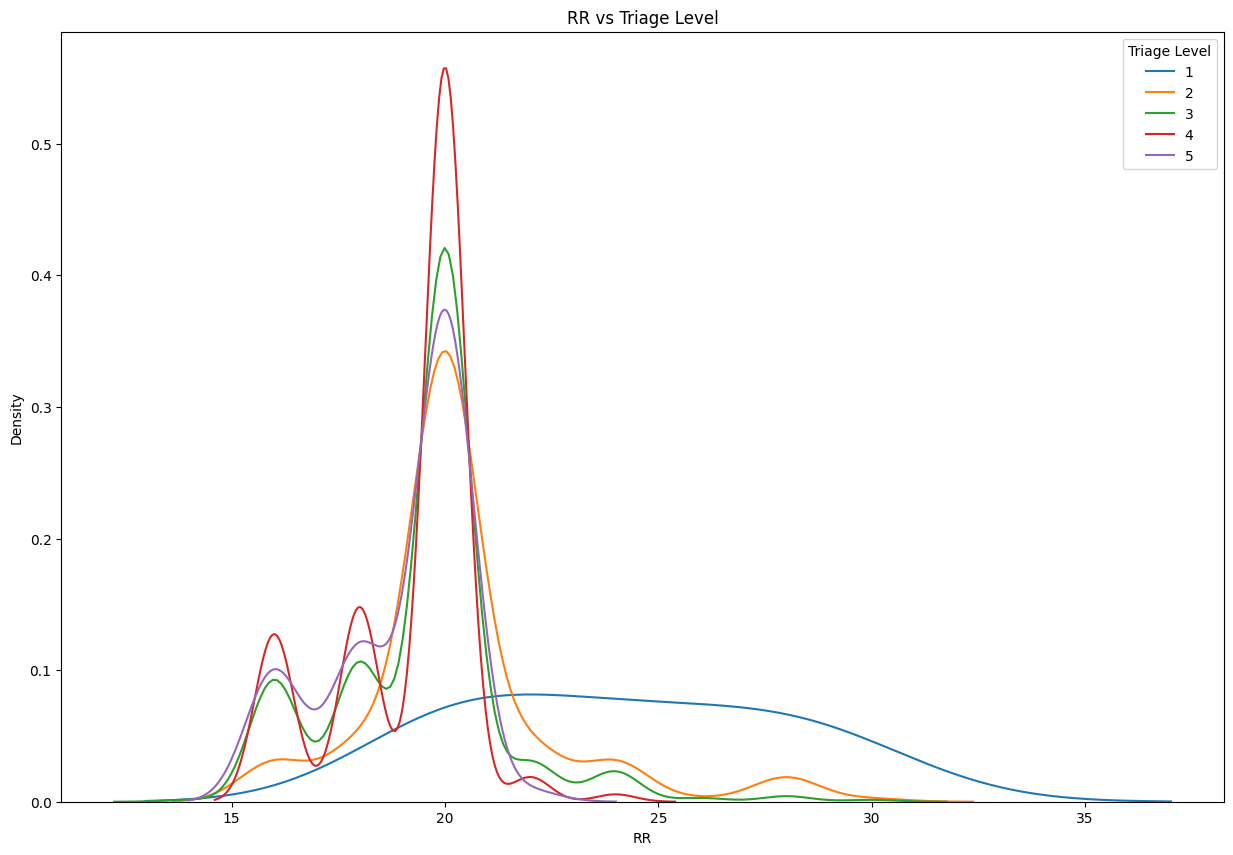

In [31]:
data['RR'] = pd.to_numeric(data['RR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['RR'], label=level)
plt.title('RR vs Triage Level')
plt.xlabel('RR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H8: **Patients with higher BT are more likely to be urgent patients**
TRUE FOR EXTREMELY HIGH BT: For extremely high BT (>39), the majority of patients are in level 2 triage, which means they are urgent patients.

FALSE FOR NOT TOO HIGH BT: For standard higher BT (>37 and <39), the density of patients is distributed in each level of triage.

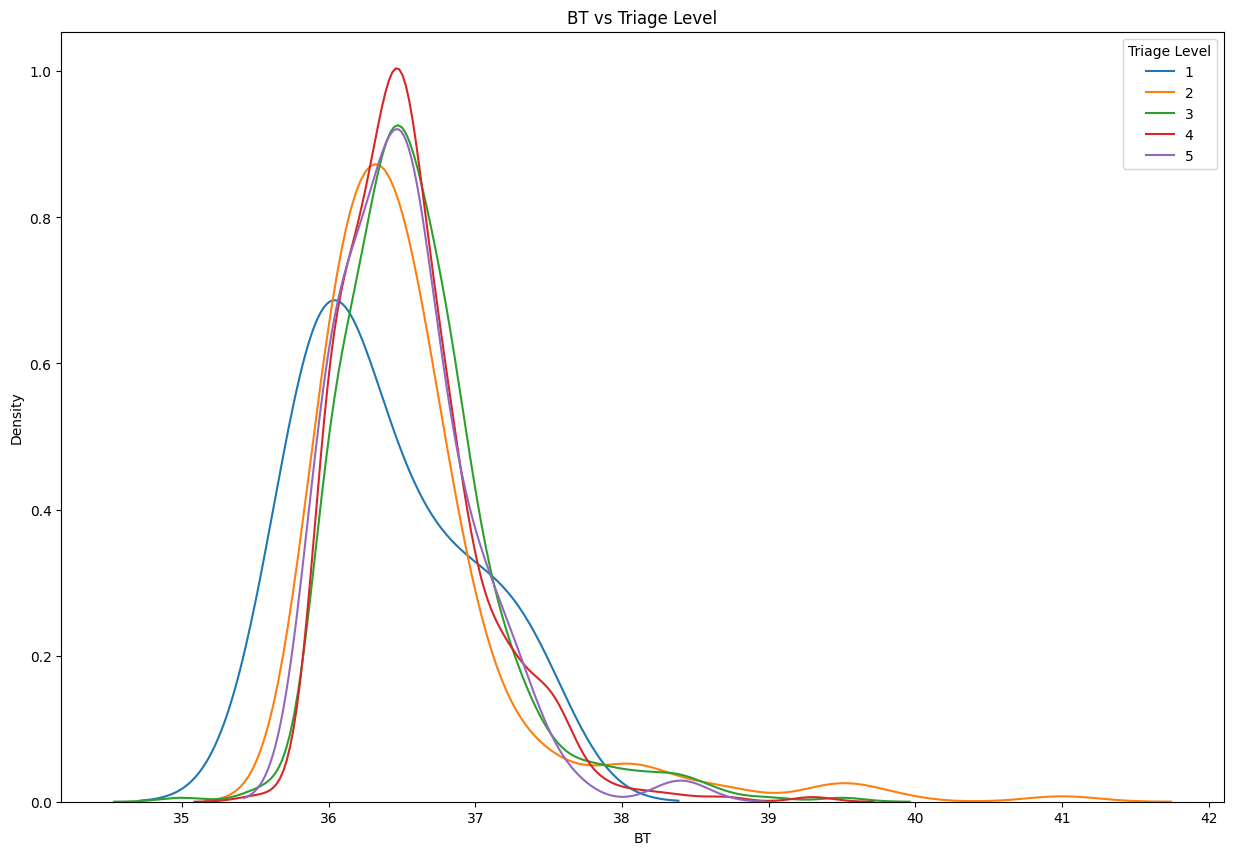

In [32]:
data['BT'] = pd.to_numeric(data['BT'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['BT'], label=level)
plt.title('BT vs Triage Level')
plt.xlabel('BT')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H9: **Patients with lower Saturation values are more likely to be urgent patients**
TRUE: Patients with saturations below 90 +/- are in triage levels 1/2/3, which means they are urgent patients.

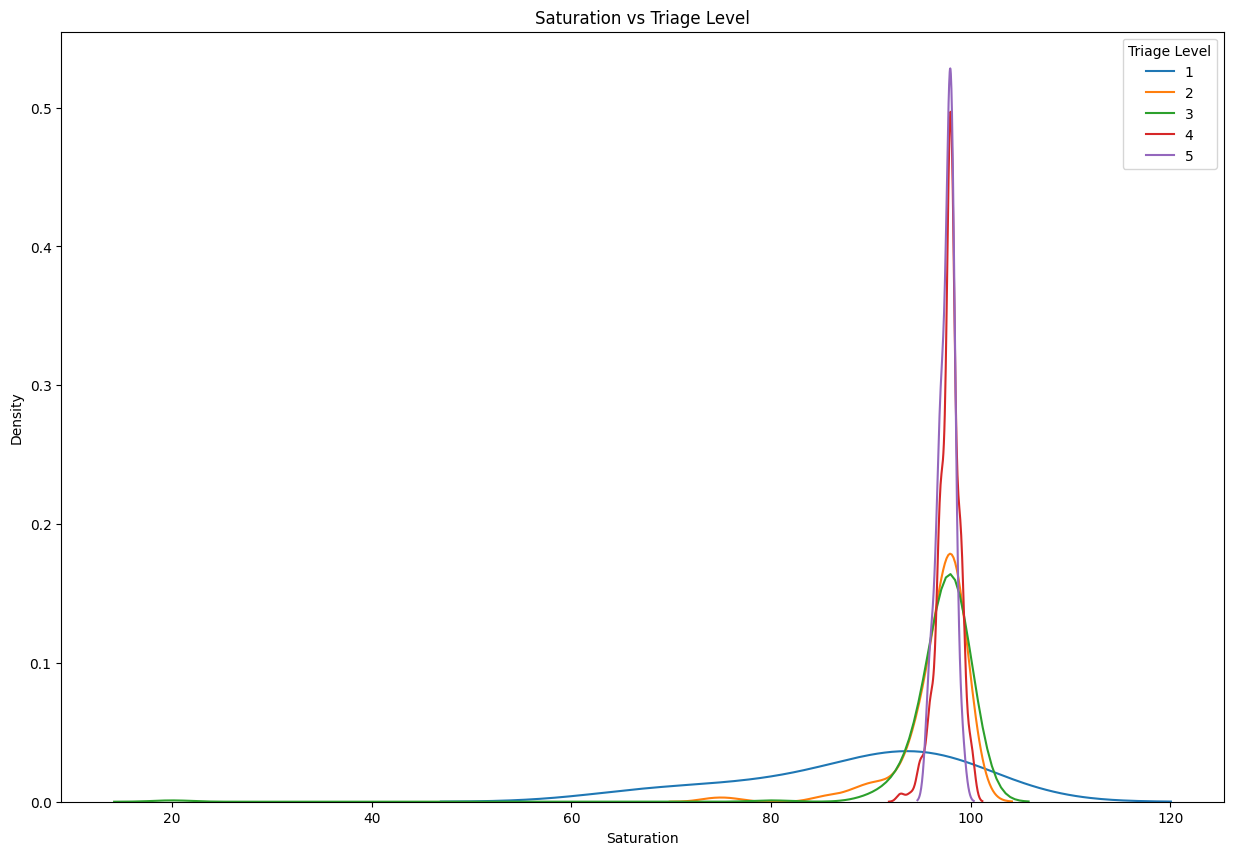

In [33]:
data['Saturation'] = pd.to_numeric(data['Saturation'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['Saturation'], label=level)
plt.title('Saturation vs Triage Level')
plt.xlabel('Saturation')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

## Feature Imputation

### Checking all missing values



In [72]:
missing_values = [column for column in data.columns if data[column].isnull().sum() > 0]
for column in missing_values:
  print('Column ', column, ' has ', data[column].isnull().sum(), ' missing values')

Column  SBP  has  25  missing values
Column  DBP  has  29  missing values
Column  HR  has  20  missing values
Column  RR  has  22  missing values
Column  BT  has  18  missing values
Column  Saturation  has  697  missing values
Column  Diagnosis in ED  has  2  missing values


### Imputing integer values

In [118]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['SBP', 'DBP', 'HR', 'RR', 'Saturation']
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
for column in columns_to_impute:
    data[column] = imp.fit_transform(data[[column]])

### Imputing real values

In [119]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
data['BT'] = imp.fit_transform(data[['BT']])

### Imputing categorical values

In [120]:
data['Diagnosis in ED'] = data['Diagnosis in ED'].fillna('No Diagnosis')

## Feature Encondig

In [121]:
data = pd.get_dummies(data, columns=['Group','Mental','Arrival mode','Disposition','Error_group','mistriage'],dtype='int64')
data.head()

,Female,Age,Patients number per hour,Injured,Chief_complain,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,KTAS_expert,Length of stay_min,KTAS duration_min,Group_Local ED 3th Degree,Group_Regional ED 4tg Degree,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Disposition_Admission to ICU,Disposition_Admission to Ward,Disposition_Death,Disposition_Discharge,Disposition_Surgery,Disposition_Transfer,Error_group_0,Error_group_Medical Records of other ED,Error_group_Mental,Error_group_On set,Error_group_Other,Error_group_Pain,Error_group_Physical Exam,Error_group_Psychatric,Error_group_Underlying Disease,Error_group_Vital Sign,mistriage_Correct,mistriage_Over Triage,mistriage_Under Triage
0,0,71,3,1,right ocular pain,1,2,160.0,100.0,84.0,18.0,36.6,100.0,2,Corneal abrasion,4,86,"5,00",0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,56,12,1,right forearm burn,1,2,137.0,75.0,60.0,20.0,36.5,98.0,4,"Burn of hand, firts degree dorsum",5,64,"3,95",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,68,8,1,"arm pain, Lt",1,2,130.0,80.0,102.0,20.0,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",5,862,"1,00",0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,71,8,0,ascites tapping,1,3,139.0,94.0,88.0,20.0,36.5,98.0,4,Alcoholic liver cirrhosis with ascites,5,108,"9,83",1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,58,4,0,"distension, abd",1,3,91.0,67.0,93.0,18.0,36.5,98.0,4,Ascites,5,109,"6,60",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## Feature Selection

In the process of refining our dataset, we aim to streamline and concentrate on elements directly associated with patient self-reporting. Given the nature of the dataset, which encompasses various hospital-related variables, we have decided to prune certain columns to prioritize aspects that individuals can personally provide. 
The following were removed:
- Patients number per hour
- Chief's Complain
- KTAS_RN
- Diagnosis in ED
- Length of stay
- KTAS duration minimum
- Group
- Disposition
- Error Group
- Mistriage

In [122]:
columns_to_drop = ['Patients number per hour', 'Chief_complain', 'KTAS_RN', 'Diagnosis in ED', 'Length of stay_min', 'KTAS duration_min']

columns_to_drop += list(data.filter(regex='Group_'))
columns_to_drop += list(data.filter(regex='Disposition_'))
columns_to_drop += list(data.filter(regex='Error_group_'))
columns_to_drop += list(data.filter(regex='mistriage_'))

data.drop(columns=columns_to_drop, inplace=True)


data.head()

,Female,Age,Injured,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_expert,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair
0,0,71,1,1,2,160.0,100.0,84.0,18.0,36.6,100.0,4,1,0,0,0,0,0,1,0,0,0,0
1,1,56,1,1,2,137.0,75.0,60.0,20.0,36.5,98.0,5,1,0,0,0,0,0,1,0,0,0,0
2,1,68,1,1,2,130.0,80.0,102.0,20.0,36.6,98.0,5,1,0,0,0,0,0,0,1,0,0,0
3,0,71,0,1,3,139.0,94.0,88.0,20.0,36.5,98.0,5,1,0,0,0,0,0,0,0,0,1,0
4,0,58,0,1,3,91.0,67.0,93.0,18.0,36.5,98.0,5,1,0,0,0,0,0,1,0,0,0,0


### Correlation Matrix

In [40]:
X = data.drop(columns=['KTAS_expert'])
y = data['KTAS_expert']

# Correlation matrix
correlation_matrix = data.corr()
# Extract correlations with the target variable
target_correlations = correlation_matrix['KTAS_expert'].sort_values(ascending=False)

# Print top correlated features
print("Top correlated features with KTAS_expert:")
print(target_correlations)


Top correlated features with KTAS_expert:
KTAS_expert                       1.000000
Arrival mode_Private Vehicle      0.299012
Mental_Alert                      0.297879
Injured                           0.210452
Pain                              0.183484
Saturation                        0.141410
NRS_pain                          0.084927
SBP                               0.066114
Arrival mode_Walking              0.051564
HR                                0.036226
DBP                               0.034369
Arrival mode_Wheelchair           0.023573
Female                           -0.005684
Arrival mode_Other               -0.011944
BT                               -0.014651
Arrival mode_Public Transport    -0.034397
Mental_Verbal Response           -0.084497
Arrival mode_Public Ambulance    -0.163605
Mental_Pain Response             -0.214934
Age                              -0.229602
RR                               -0.242843
Mental_Unresponsive              -0.260564
Arrival mode

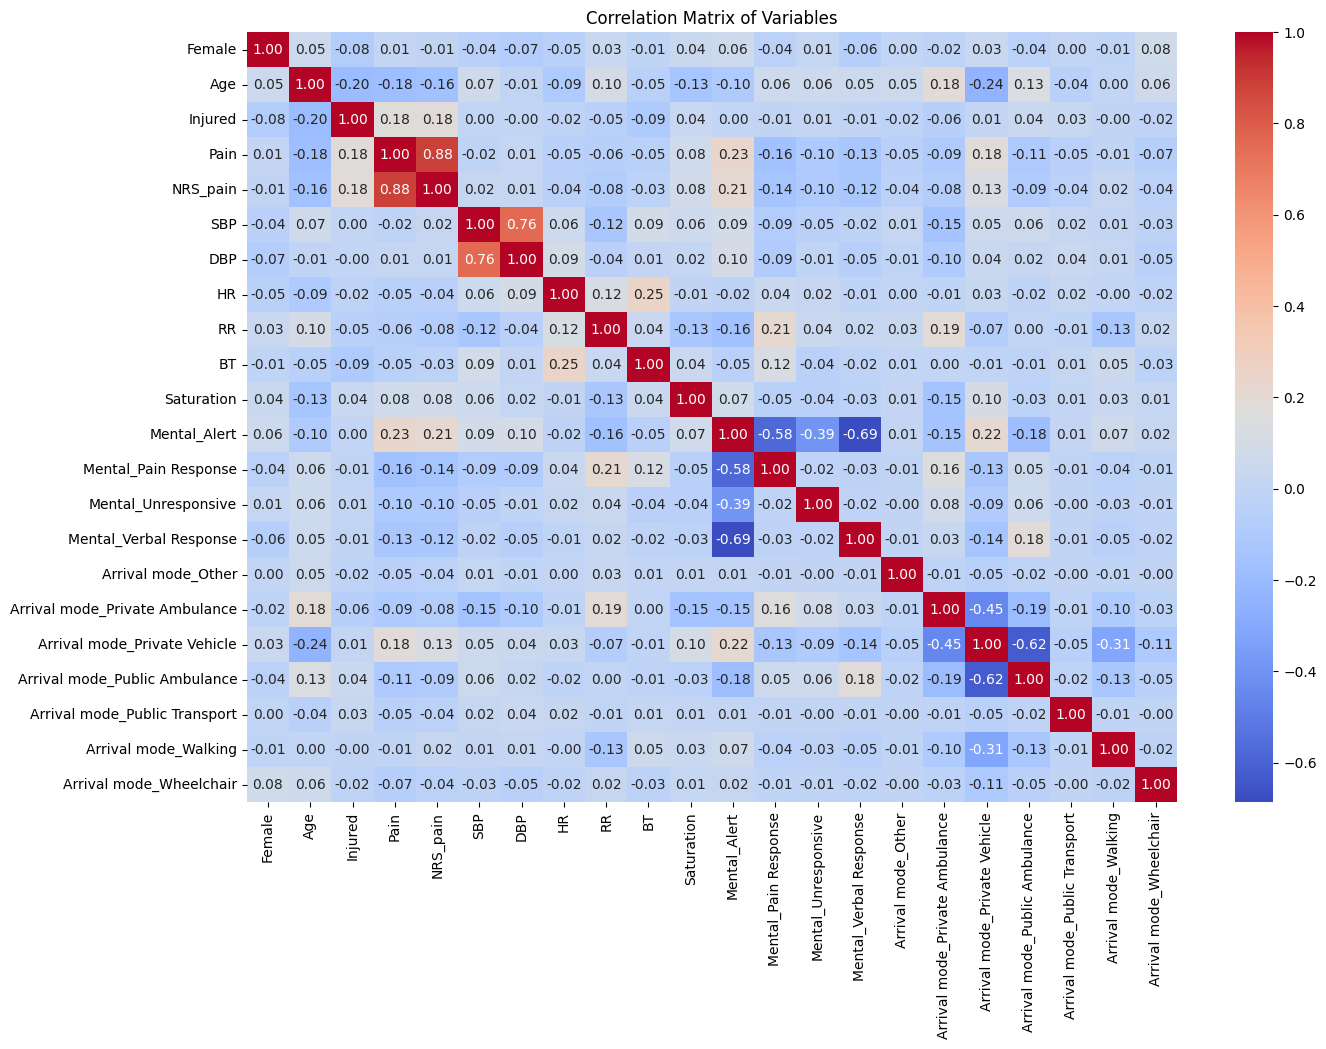

In [41]:
corr_data = data.drop(['KTAS_expert'], axis=1)

# Create correlation matrix
corr = corr_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

## Standardization and Normalization

Normalization scales the values of different features to a similar range

array([[<Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Injured'}>,
        <Axes: title={'center': 'Pain'}>,
        <Axes: title={'center': 'SBP'}>],
       [<Axes: title={'center': 'DBP'}>, <Axes: title={'center': 'HR'}>,
        <Axes: title={'center': 'RR'}>, <Axes: title={'center': 'BT'}>,
        <Axes: title={'center': 'Saturation'}>],
       [<Axes: title={'center': 'KTAS_expert'}>,
        <Axes: title={'center': 'Mental_Alert'}>,
        <Axes: title={'center': 'Mental_Pain Response'}>,
        <Axes: title={'center': 'Mental_Unresponsive'}>,
        <Axes: title={'center': 'Mental_Verbal Response'}>],
       [<Axes: title={'center': 'Arrival mode_Other'}>,
        <Axes: title={'center': 'Arrival mode_Private Ambulance'}>,
        <Axes: title={'center': 'Arrival mode_Private Vehicle'}>,
        <Axes: title={'center': 'Arrival mode_Public Ambulance'}>,
        <Axes: title={'center': 'Arrival mode_Public Transpo

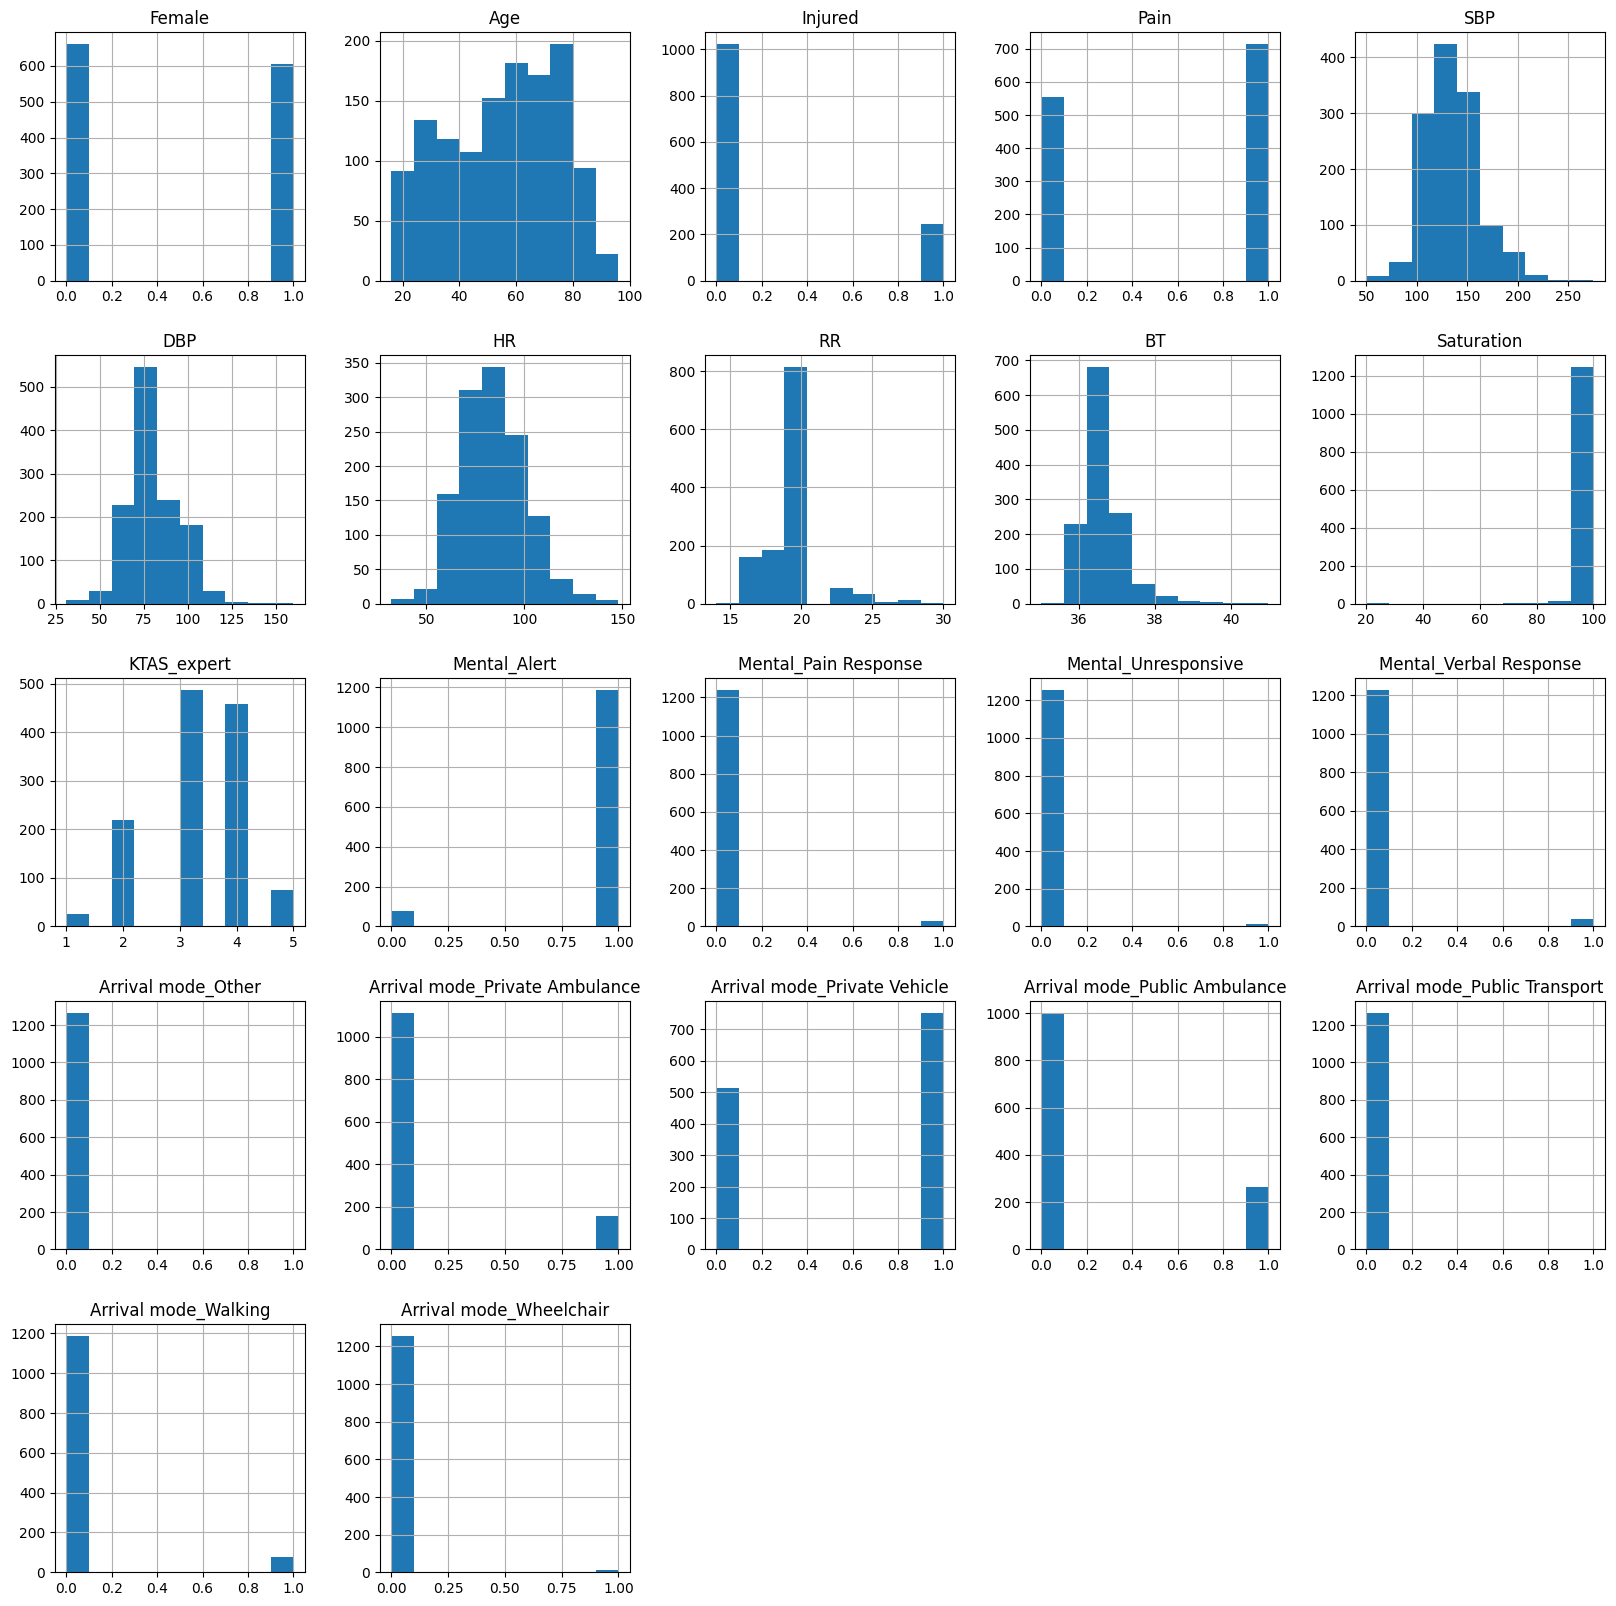

In [123]:
data.hist(figsize=(20,20))

Columns to Normalize:
- Age
- NRS_Pain
- SBP
- DBP
- HR
- RR
- BT
- Saturation


In [124]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Data to normalize
normalize = ['Age', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']

datapd = pd.DataFrame(data, columns=normalize)

normalizer = MinMaxScaler()
data[normalize] = normalizer.fit_transform(datapd)

data.head()

,Female,Age,Injured,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_expert,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair
0,0,0.6875,1,1,0.2,0.488889,0.534884,0.448276,0.250,0.266667,1.000,4,1,0,0,0,0,0,1,0,0,0,0
1,1,0.5000,1,1,0.2,0.386667,0.341085,0.241379,0.375,0.250000,0.975,5,1,0,0,0,0,0,1,0,0,0,0
2,1,0.6500,1,1,0.2,0.355556,0.379845,0.603448,0.375,0.266667,0.975,5,1,0,0,0,0,0,0,1,0,0,0
3,0,0.6875,0,1,0.3,0.395556,0.488372,0.482759,0.375,0.250000,0.975,5,1,0,0,0,0,0,0,0,0,1,0
4,0,0.5250,0,1,0.3,0.182222,0.279070,0.525862,0.250,0.250000,0.975,5,1,0,0,0,0,0,1,0,0,0,0


Standardization (z-score normalization) transforms the features to have a mean of 0 and a standard deviation of 1.

In [130]:
#Print standard deviation and mean of the data as table
print("Standard deviation and mean of the data:")
print(data.describe().T[['mean', 'std']])


Standard deviation and mean of the data:
                                        mean       std
Female                         -3.995751e-17  1.000395
Age                            -3.701328e-16  1.000395
Injured                        -5.047265e-17  1.000395
Pain                           -1.794583e-16  1.000395
NRS_pain                        6.729687e-17  1.000395
SBP                            -1.289857e-16  1.000395
DBP                             5.327669e-17  1.000395
HR                              2.944238e-16  1.000395
RR                             -9.673924e-17  1.000395
BT                             -4.738821e-16  1.000395
Saturation                      1.460903e-15  1.000395
KTAS_expert                    -1.009453e-16  1.000395
Mental_Alert                    1.570260e-16  1.000395
Mental_Pain Response           -2.243229e-17  1.000395
Mental_Unresponsive            -5.608072e-18  1.000395
Mental_Verbal Response         -2.804036e-17  1.000395
Arrival mode_Other      

In [129]:
#Standardize the data
from sklearn.preprocessing import StandardScaler


#Standardize the data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Data Spliting

In [131]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


## Feature Importance

In [132]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest for feature importance in train set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Random Forest:")
print(feature_importance_rf)


Feature Importance Scores for Random Forest:
Age                               0.137061
HR                                0.132364
SBP                               0.116530
DBP                               0.106794
BT                                0.106165
NRS_pain                          0.093818
Saturation                        0.053662
RR                                0.051027
Injured                           0.045665
Female                            0.029988
Arrival mode_Private Vehicle      0.024905
Pain                              0.019043
Arrival mode_Private Ambulance    0.017785
Mental_Alert                      0.016233
Arrival mode_Public Ambulance     0.015132
Mental_Unresponsive               0.010382
Arrival mode_Walking              0.009082
Mental_Pain Response              0.006760
Mental_Verbal Response            0.005637
Arrival mode_Wheelchair           0.001375
Arrival mode_Public Transport     0.000315
Arrival mode_Other                0.000277
dtype: f

In [133]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting for feature importance in train set
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Feature importance
feature_importance_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Gradient Boosting:")
print(feature_importance_gb)



Feature Importance Scores for Gradient Boosting:
NRS_pain                          0.192169
Age                               0.109134
HR                                0.106334
SBP                               0.102508
Injured                           0.091998
DBP                               0.075157
BT                                0.073736
Saturation                        0.049448
Arrival mode_Private Vehicle      0.045945
RR                                0.042869
Arrival mode_Private Ambulance    0.031872
Mental_Unresponsive               0.018852
Mental_Alert                      0.015057
Mental_Pain Response              0.012416
Female                            0.012122
Arrival mode_Walking              0.009417
Arrival mode_Public Ambulance     0.004488
Mental_Verbal Response            0.002937
Arrival mode_Wheelchair           0.001874
Arrival mode_Public Transport     0.000841
Pain                              0.000802
Arrival mode_Other                0.000023
dtyp

In [134]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree for feature importance in train set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Feature importance
feature_importance_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Decision Tree:")
print(feature_importance_dt)



Feature Importance Scores for Decision Tree:
Age                               0.158660
HR                                0.141859
NRS_pain                          0.126729
DBP                               0.101293
SBP                               0.100675
BT                                0.089136
RR                                0.053255
Saturation                        0.048831
Injured                           0.044995
Arrival mode_Private Vehicle      0.031224
Female                            0.030346
Mental_Unresponsive               0.020022
Arrival mode_Walking              0.016300
Mental_Verbal Response            0.010693
Mental_Alert                      0.008608
Arrival mode_Public Ambulance     0.007863
Pain                              0.005198
Mental_Pain Response              0.004313
Arrival mode_Other                0.000000
Arrival mode_Private Ambulance    0.000000
Arrival mode_Public Transport     0.000000
Arrival mode_Wheelchair           0.000000
dtype: f

In [135]:
#Mean of feature importance
feature_importance = pd.DataFrame([feature_importance_rf, feature_importance_gb, feature_importance_dt]).T
feature_importance['Mean'] = feature_importance.mean(axis=1)
feature_importance.sort_values(by='Mean', ascending=False, inplace=True)
print("\nMean of Feature Importance Scores:")
print(feature_importance['Mean'])



Mean of Feature Importance Scores:
NRS_pain                          0.137572
Age                               0.134952
HR                                0.126852
SBP                               0.106571
DBP                               0.094415
BT                                0.089679
Injured                           0.060886
Saturation                        0.050647
RR                                0.049051
Arrival mode_Private Vehicle      0.034024
Female                            0.024152
Arrival mode_Private Ambulance    0.016553
Mental_Unresponsive               0.016419
Mental_Alert                      0.013299
Arrival mode_Walking              0.011600
Arrival mode_Public Ambulance     0.009161
Pain                              0.008348
Mental_Pain Response              0.007830
Mental_Verbal Response            0.006422
Arrival mode_Wheelchair           0.001083
Arrival mode_Public Transport     0.000385
Arrival mode_Other                0.000100
Name: Mean, dtype:

# Models

## Model Evaluation

In [186]:
def evaluate_model (model, X_train, X_test, y_train, y_test):
    # Model prediction
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Model evaluation
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

    # Results to show 
        # Accuracy score
        # Precision
        # Recall
        # F1 score
        # Classification report

    # Training results
    print("Training Results:\n")
    print("Accuracy score: ", accuracy_score(y_train, y_pred_train))
    print("Precision score: ", precision_score(y_train, y_pred_train, average='weighted'))
    print("Recall score: ", recall_score(y_train, y_pred_train, average='weighted'))
    print("F1 score: ", f1_score(y_train, y_pred_train, average='weighted'))

    # Testing results
    print("\nTesting Results:\n")
    print("Accuracy score: ", accuracy_score(y_test, y_pred_test))
    print("Precision score: ", precision_score(y_test, y_pred_test, average='weighted'))
    print("Recall score: ", recall_score(y_test, y_pred_test, average='weighted'))
    print("F1 score: ", f1_score(y_test, y_pred_test, average='weighted'))

    #AUC and ROC curve
    from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


    # Plot roc curve
    plt.figure(figsize=(15, 10))
    #For each class
    for i in range(len(model.classes_)):
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=model.classes_[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(model.classes_[i], roc_auc))
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


    # Plot confusion matrix
    plt.figure(figsize=(15, 10))
    confusion_matrix = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    



### Support Vector Machine

Training Results:

Accuracy score:  0.4336842105263158
Precision score:  0.3284616805170822
Recall score:  0.4336842105263158
F1 score:  0.3710762829015399

Testing Results:

Accuracy score:  0.4416403785488959
Precision score:  0.3394215090141575
Recall score:  0.4416403785488959
F1 score:  0.3762199870663526


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


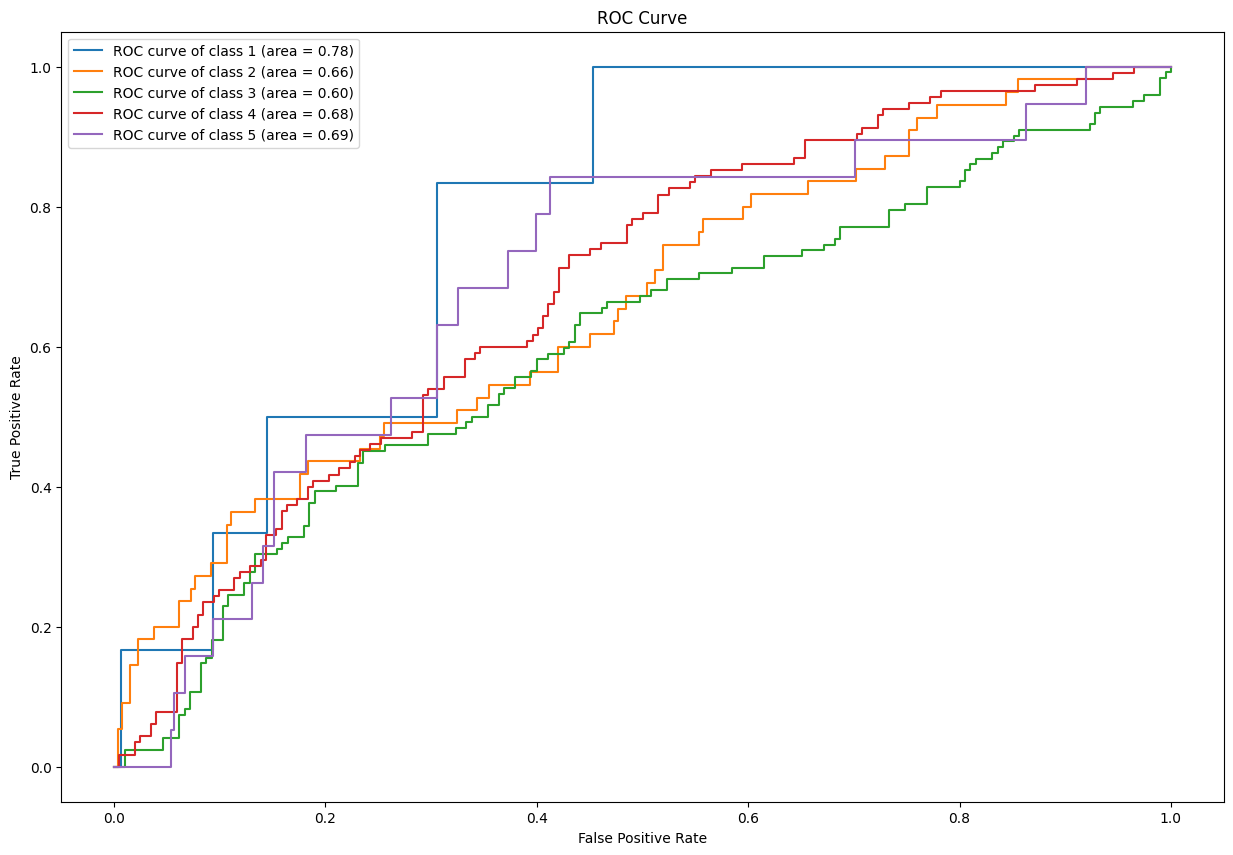

<Figure size 1500x1000 with 0 Axes>

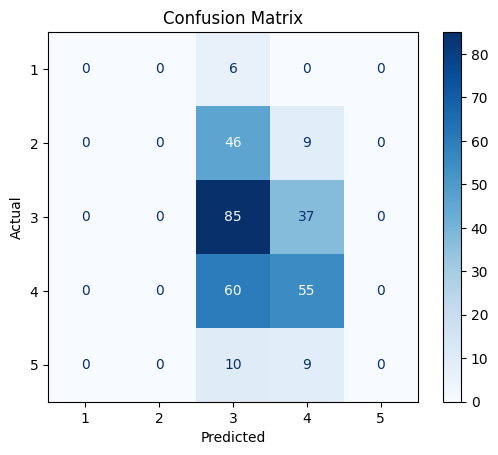

In [187]:
#SVM
from sklearn.svm import SVC

# Train SVM
svm = SVC(probability=True)
# Fit the model
svm.fit(X_train, y_train)
# Evaluate the model
evaluate_model(svm, X_train, X_test, y_train, y_test)

### Decision Trees

Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.444794952681388
Precision score:  0.4489239917360692
Recall score:  0.444794952681388
F1 score:  0.44368744643841573


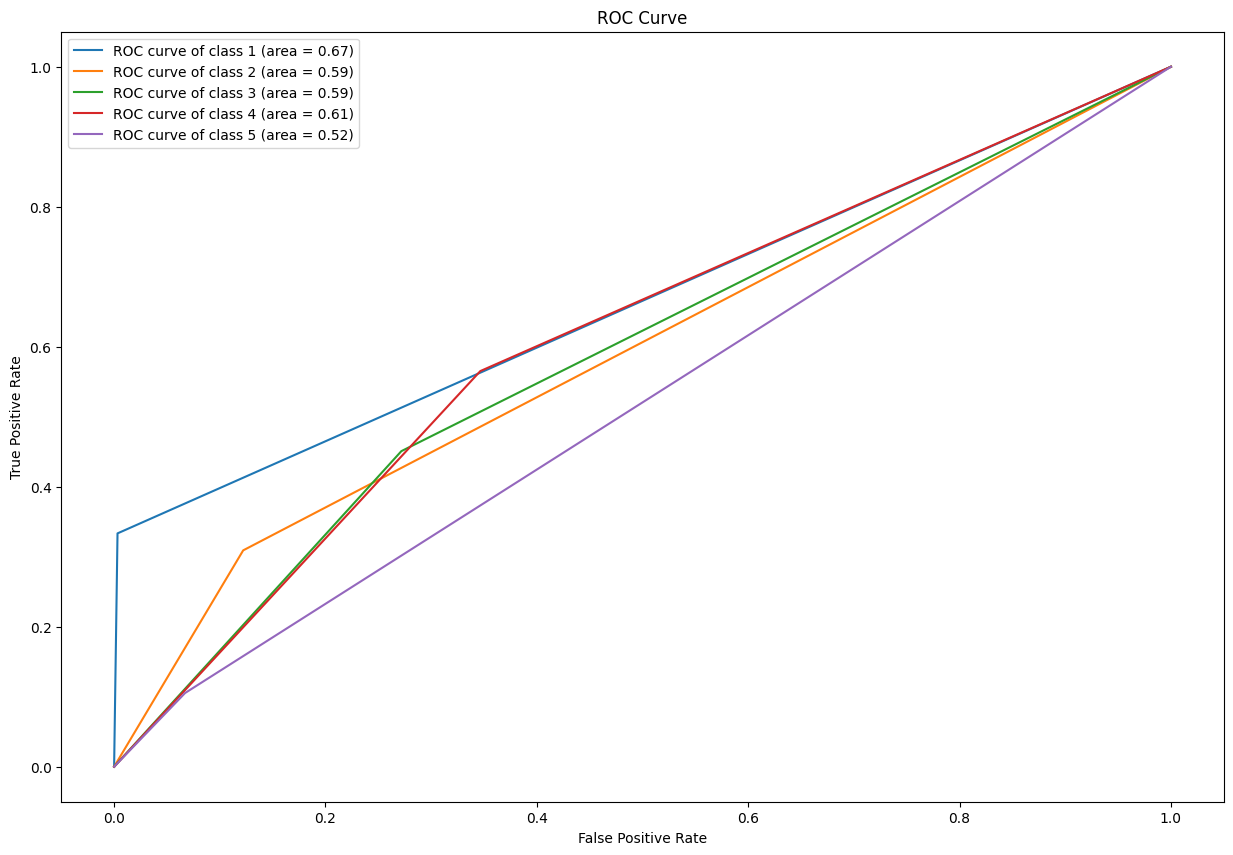

<Figure size 1500x1000 with 0 Axes>

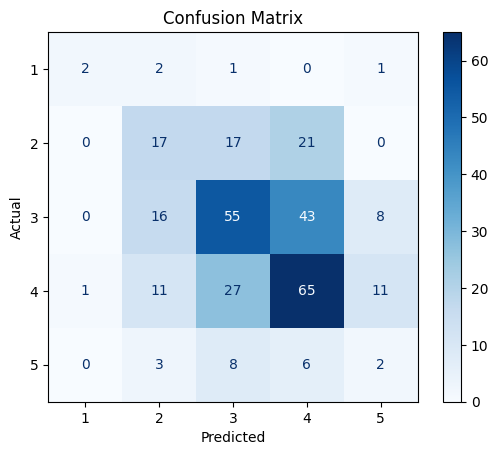

In [190]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier()
# Fit the model
dt.fit(X_train, y_train)
# Evaluate the model
evaluate_model(dt, X_train, X_test, y_train, y_test)

### K-Nearest Neighbors

Training Results:

Accuracy score:  0.6168421052631579
Precision score:  0.6138797855470814
Recall score:  0.6168421052631579
F1 score:  0.6059326457889809

Testing Results:

Accuracy score:  0.33753943217665616
Precision score:  0.33641717038451124
Recall score:  0.33753943217665616
F1 score:  0.3309112609937805


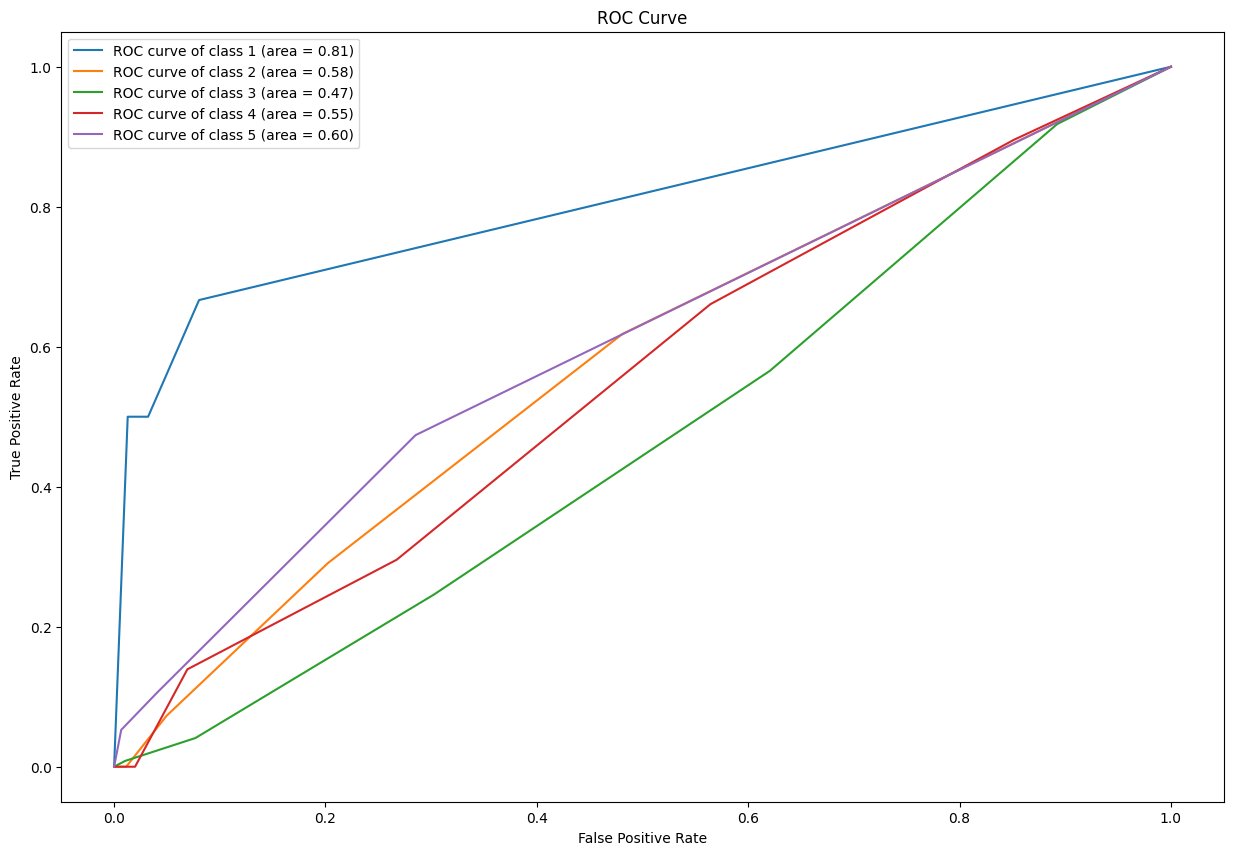

<Figure size 1500x1000 with 0 Axes>

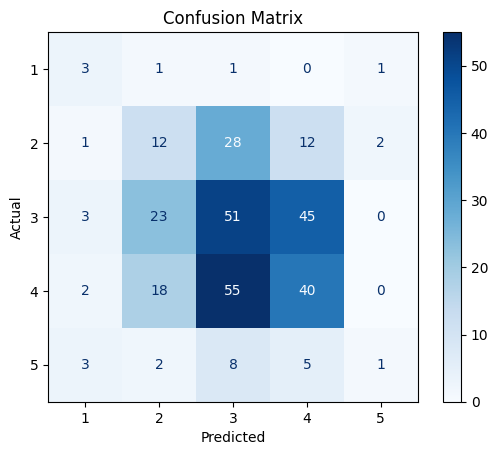

In [189]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier()
# Fit the model
knn.fit(X_train, y_train)
# Evaluate the model
evaluate_model(knn, X_train, X_test, y_train, y_test)

### Multi-class Logistic Regression

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},
C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Training Results:

Accuracy score:  0.45789473684210524
Precision score:  0.424719861976787
Recall score:  0.45789473684210524
F1 score:  0.4245195802114709

Testing Results:

Accuracy score:  0.47318611987381703
Precision score:  0.4436949666013931
Recall score:  0.47318611987381703
F1 score:  0.4458553069993967


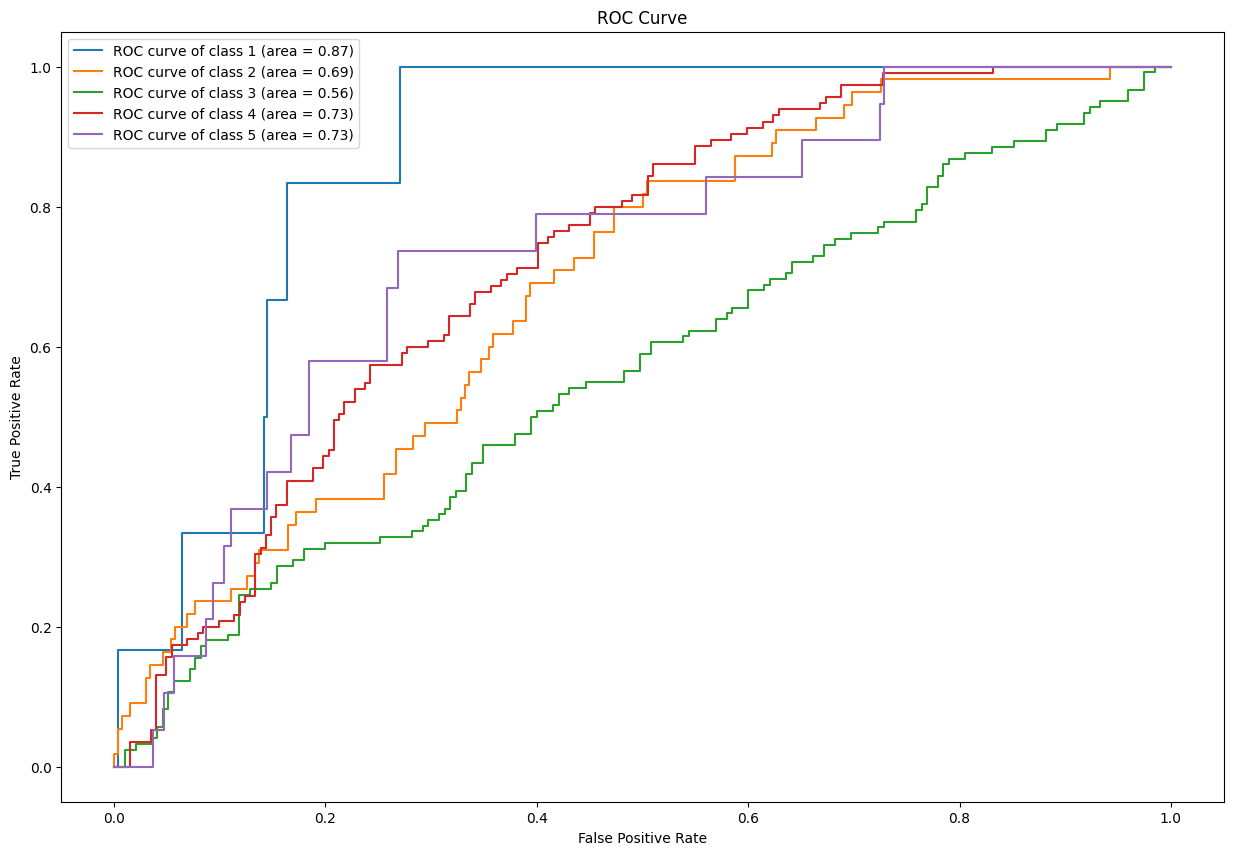

<Figure size 1500x1000 with 0 Axes>

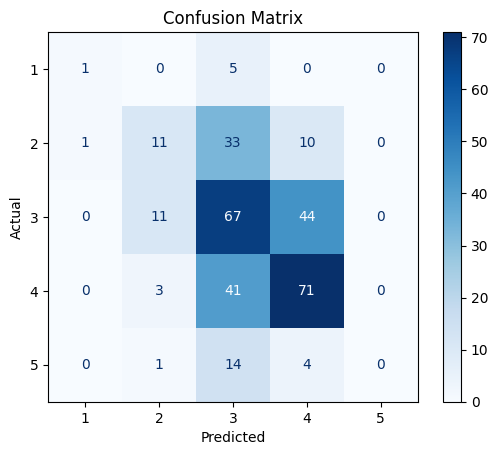

In [191]:
#Multi class logistic regression
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression()
# Fit the model
lr.fit(X_train, y_train)
# Evaluate the model
evaluate_model(lr, X_train, X_test, y_train, y_test)

### Random Forest

Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.6403785488958991
Precision score:  0.5967312100024301
Recall score:  0.6403785488958991
F1 score:  0.6134346604802682


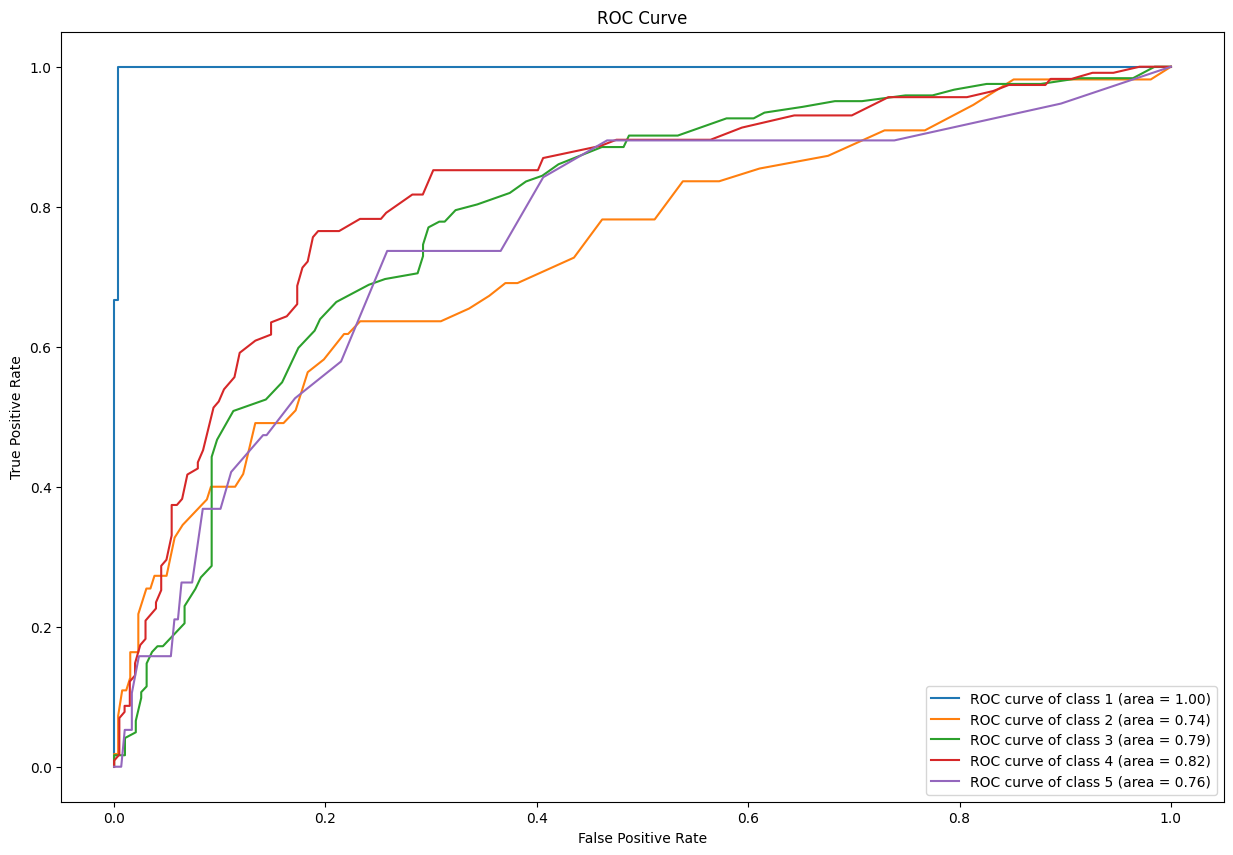

<Figure size 1500x1000 with 0 Axes>

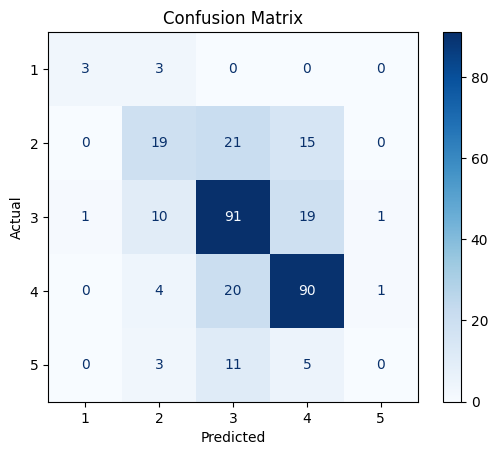

In [198]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier()
# Fit the model
rf.fit(X_train, y_train)
# Evaluate the model
evaluate_model(rf, X_train, X_test, y_train, y_test)